## Harry Potter Movie Analysis

Alice Ding, Shoshana Farber, Christian Uriostegui

### Overview

Using [this](https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset) collection of .csvs on Kaggle that has information from all eight Harry Potter movies, we plan on creating a character relationship network to analyze the strength between these connections by finding how many scenes each character shares with another. We will also be processing the dialogue to extract common themes and sentiment. 

For this project, we will be focusing on the `Dialogue.csv` file for most of this analysis, however we will be pulling information from several of the other files as well as complementary data.

### Importing the Data

To start, we've uploaded the data into our GitHub and will be pulling it in using pandas.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dialogue = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Dialogue.csv', encoding = 'ISO-8859-1')
dialogue.head()

Dialogue ID  Chapter ID  Place ID  Character ID  \
0            1           1         8             4   
1            2           1         8             7   
2            3           1         8             4   
3            4           1         8             7   
4            5           1         8             4   

                                            Dialogue  
0  I should have known that you would be here...P...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.

From what we can see above, the `Chapter ID`, `Place ID`, and `Character ID` use ints to represent places and characters respectively. For readability, we will replace these IDs with their actual values; these can be found in the `Chapters.csv`, `Places.csv`, and `Characters.csv` files. We'll also be including other data from a few of the other tables as well to create a fuller dataset.

In [2]:
chapters = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Chapters.csv', encoding = 'ISO-8859-1')
places = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Places.csv')
characters = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Characters.csv', encoding = 'ISO-8859-1')
movies = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Movies.csv')

dialogue = dialogue.merge(chapters, on='Chapter ID', how='left')
dialogue = dialogue.merge(characters, on='Character ID', how='left')
dialogue = dialogue.merge(places, on='Place ID', how='left')
dialogue = dialogue.merge(movies, on='Movie ID', how='left')
dialogue.head()

Dialogue ID  Chapter ID  Place ID  Character ID  \
0            1           1         8             4   
1            2           1         8             7   
2            3           1         8             4   
3            4           1         8             7   
4            5           1         8             4   

                                            Dialogue       Chapter Name  \
0  I should have known that you would be here...P...  Doorstep Delivery   
1  Good evening, Professor Dumbledore. Are the ru...  Doorstep Delivery   
2   I'm afraid so, Professor. The good, and the bad.  Doorstep Delivery   
3                                       And the boy?  Doorstep Delivery   
4                            Hagrid is bringing him.  Doorstep Delivery   

   Movie ID  Movie Chapter      Character Name Species  ... Patronus  \
0         1              1    Albus Dumbledore   Human  ...  Phoenix   
1         1              1  Minerva McGonagall   Human  ...      Cat   
2         1              1    Albus Dumbledore   Human  ...  Phoenix   
3         1              1  Minerva McGonagall   Human  ...      Cat   
4         1              1    Albus Dumbledore   Human  ...  Phoenix   

  Wand (Wood)         Wand (Core)      Place Name Place Category  \
0       Elder  Thestral Tail Hair  4 Privet Drive      Dwellings   
1         Fir  Dragon Heartstring  4 Privet Drive      Dwellings   
2       Elder  Thestral Tail Hair  4 Privet Drive      Dwellings   
3         Fir  Dragon Heartstring  4 Privet Drive      Dwellings   
4       Elder  Thestral Tail Hair  4 Privet Drive      Dwellings   

                                Movie Title Release Year Runtime  \
0  Harry Potter and the Philosopher's Stone         2001     152   
1  Harry Potter and the Philosopher's Stone         2001     152   
2  Harry Potter and the Philosopher's Stone         2001     152   
3  Harry Potter and the Philosopher's Stone         2001     152   
4  Harry Potter and the Philosopher's Stone         2001     152   

          Budget       Box Office  
0  $125,000,000   $1,002,000,000   
1  $125,000,000   $1,002,000,000   
2  $125,000,000   $1,002,000,000   
3  $125,000,000   $1,002,000,000   
4  $125,000,000   $1,002,000,000   

[5 rows x 22 columns]

We've appended all of the information now -- it looks like a very wide table now though. Let's select the most relevant fields and remove redundant/unnecessary ones.

In [3]:
final_dialogue = dialogue[['Dialogue ID', 'Movie Title', 'Chapter ID', 'Chapter Name', 'Place Name', 'Place Category', 'Character Name', 'House', 'Dialogue']]
final_dialogue = final_dialogue.rename(columns={'Dialogue ID': 'dialogue_id', 
                                                'Movie Title': 'movie_title', 
                                                'Chapter ID': 'chapter_id',
                                                'Chapter Name': 'chapter_name',
                                                'Place Name': 'place_name',
                                                'Place Category': 'place_category', 
                                                'Character Name': 'character_name', 
                                                'House': 'house', 
                                                'Dialogue': 'dialogue'})

final_dialogue.head()

dialogue_id                               movie_title  chapter_id  \
0            1  Harry Potter and the Philosopher's Stone           1   
1            2  Harry Potter and the Philosopher's Stone           1   
2            3  Harry Potter and the Philosopher's Stone           1   
3            4  Harry Potter and the Philosopher's Stone           1   
4            5  Harry Potter and the Philosopher's Stone           1   

        chapter_name      place_name place_category      character_name  \
0  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
1  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
2  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
3  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
4  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   

        house                                           dialogue  
0  Gryffindor  I should have known that you would be here...P...  
1  Gryffindor  Good evening, Professor Dumbledore. Are the ru...  
2  Gryffindor   I'm afraid so, Professor. The good, and the bad.  
3  Gryffindor                                       And the boy?  
4  Gryffindor                            Hagrid is bringing him.

Our final dataframe is comprised of the following information:

- `dialogue_id`: ID of each line spoken by a character; primary key
- `movie_title`: Movie that this dialogue takes place in
- `chapter_id`: Chapter ID that this dialogue takes place in
- `chapter_name`: Chapter that this dialogue takes place in
- `place_name`: Where the character is located when speaking this dialogue
- `place_category`: Category of the place, can be:
    - Hogwarts
    - Dwellings
    - Other Magical Locations
    - Diagon Alley
    - Hogsmeade
- `character_name`: Character who said this dialogue
- `dialogue`: What the character said

What does this data look like?

### Exploration

How much dialogue happens in each movie?

In [4]:
final_dialogue['movie_title'].value_counts()

movie_title
Harry Potter and the Order of the Phoenix      1157
Harry Potter and the Half-Blood Prince         1070
Harry Potter and the Deathly Hallows Part 1    1012
Harry Potter and the Chamber of Secrets         986
Harry Potter and the Philosopher's Stone        885
Harry Potter and the Prisoner of Azkaban        881
Harry Potter and the Goblet of Fire             741
Harry Potter and the Deathly Hallows Part 2     712
Name: count, dtype: int64

Order of the Phoenix leads the charge at 1.1k lines of dialogue while Deathly Hallows Part 2 only has 712 -- very interesting range.

What about locations?

In [5]:
final_dialogue['place_category'].value_counts()

place_category
Hogwarts                   4504
Dwellings                  1408
Other Magical Locations     953
Diagon Alley                304
Hogsmeade                   275
Name: count, dtype: int64

In terms of categories of location, it's not surprising that Hogwarts has the most dialogue in terms of location; a majority of the books occur at the school. 

What do counts look like by character?

In [6]:
final_dialogue['character_name'].value_counts().head()

character_name
Harry Potter        1922
Ron Weasley          865
Hermione Granger     848
Albus Dumbledore     474
Rubeus Hagrid        228
Name: count, dtype: int64

For the top 5 characters, these aren't too surprising -- Harry having more than double the amount of lines as the next highest (Ron) is more extreme than we would've thought, but it otherwise it isn't too surprising. The top three are the main friend group with Dumbledore and Hagrid as close allies, so it makes sense that these characters would have the most dialogue.

Now that we have a sense of the data, we can get into network creation!

### Prepping the Data

We'll be counting a connection as a shared chapter and place between characters and we can use different values for the weights: either the count of scenes shared, or dialogue spoken between characters. For example, the first scene of the first movie is McGonagall and Dumbledore speaking to each other; this would count as one scene together and however much dialogue they shared, that would count as amount of lines spoken to one another.

To do this, we'll have to create a data frame with the following columns:

- `character1`: First character involved in a scene/place combo
- `character2`: Second character involved in a scene/place combo
- `scenes`: Shared scene count
- `dialogue`: Count of lines spoken between these characters

In [7]:
# Step 1: Group by chapter and place to get a list of characters involved in each interaction
by_chapter_place = final_dialogue[['chapter_id', 'place_name', 'character_name', 'dialogue_id']].groupby(['chapter_id', 'place_name', 'character_name']).nunique().reset_index()
by_chapter_place.rename(columns={'dialogue_id': 'dialogue', 'character_name': 'character1'}, inplace=True)

by_chapter_place.head(20)

chapter_id          place_name          character1  dialogue
0            1      4 Privet Drive    Albus Dumbledore         9
1            1      4 Privet Drive  Minerva McGonagall         5
2            1      4 Privet Drive       Rubeus Hagrid         2
3            2      4 Privet Drive      Dudley Dursley        11
4            2      4 Privet Drive        Harry Potter         5
5            2      4 Privet Drive                 Man         1
6            2      4 Privet Drive     Petunia Dursley         9
7            2      4 Privet Drive             Student         1
8            2      4 Privet Drive      Vernon Dursley         6
9            3      4 Privet Drive      Dudley Dursley         4
10           3      4 Privet Drive        Harry Potter         8
11           3      4 Privet Drive     Petunia Dursley         6
12           3      4 Privet Drive      Vernon Dursley        14
13           4     Hut-on-the-Rock      Dudley Dursley         2
14           4     Hut-on-the-Rock        Harry Potter        13
15           4     Hut-on-the-Rock     Petunia Dursley         2
16           4     Hut-on-the-Rock       Rubeus Hagrid        16
17           4     Hut-on-the-Rock      Vernon Dursley         5
18           5  The Leaky Cauldron                 Boy         1
19           5  The Leaky Cauldron              Goblin         1

From this, we would want to extract that from the first chapter, Dumbledore, McGonagall and Hagrid are connected with a scene weight of 1 and a dialogue weight of 9, 5, and 2 respectively for each character. To do this, we will first get a combination of chapter, place, and characters in that scene before then merging these two dataframes to get all of the information.

In [8]:
# Step 2: Create a dataframe with all unique combinations of chapter_id, and place_name involved
unique_combinations = pd.DataFrame(final_dialogue[['chapter_id', 'place_name']].drop_duplicates())
unique_combinations['key'] = 1  # use this as a dummy column for merging

unique_combinations.head()

chapter_id          place_name  key
0             1      4 Privet Drive    1
16            2      4 Privet Drive    1
49            3      4 Privet Drive    1
81            4     Hut-on-the-Rock    1
119           5  The Leaky Cauldron    1

In [9]:
# Step 3: Merge the two dataframes to combine the information
combined_df = pd.merge(unique_combinations, by_chapter_place, on=['chapter_id', 'place_name'], how='left') # merge both dataframes
combined_df = pd.merge(combined_df, by_chapter_place, on=['chapter_id', 'place_name'], how='left')
combined_df = combined_df[combined_df['character1_x'] != combined_df['character1_y']]  # exclude self-combinations
combined_df['scenes'] = combined_df.groupby(['chapter_id', 'place_name'])['character1_x'].transform('count')  # add scenes column
combined_df = combined_df.groupby(['chapter_id', 'place_name', 'character1_x', 'character1_y']).agg({'scenes': 'count', 'dialogue_x': 'sum'}).reset_index()
combined_df.rename(columns={'character1_x': 'character1', 'character1_y': 'character2', 'dialogue_x': 'dialogue'}, inplace=True)
combined_df = combined_df[['character1', 'character2', 'scenes', 'dialogue']]

combined_df.head()

character1          character2  scenes  dialogue
0    Albus Dumbledore  Minerva McGonagall       1         9
1    Albus Dumbledore       Rubeus Hagrid       1         9
2  Minerva McGonagall    Albus Dumbledore       1         5
3  Minerva McGonagall       Rubeus Hagrid       1         5
4       Rubeus Hagrid    Albus Dumbledore       1         2

Great! Last step is just to aggregate it so we get the summation of scenes and dialogue for each of the combinations.

In [10]:
final_df = combined_df.groupby(['character1', 'character2']).agg({'scenes': 'sum', 'dialogue': 'sum'}).reset_index()
final_df.head()

character1        character2  scenes  dialogue
0  Aberforth Dumbledore      Harry Potter       1        18
1  Aberforth Dumbledore  Hermione Granger       1        18
2  Aberforth Dumbledore       Ron Weasley       1        18
3         Alastor Moody  Albus Dumbledore       8        19
4         Alastor Moody  Barty Crouch Jr.       2        12

With this set up, we can now try making the graph!

### Network Creation

We'll start with just looking at the network by scene count among characters.

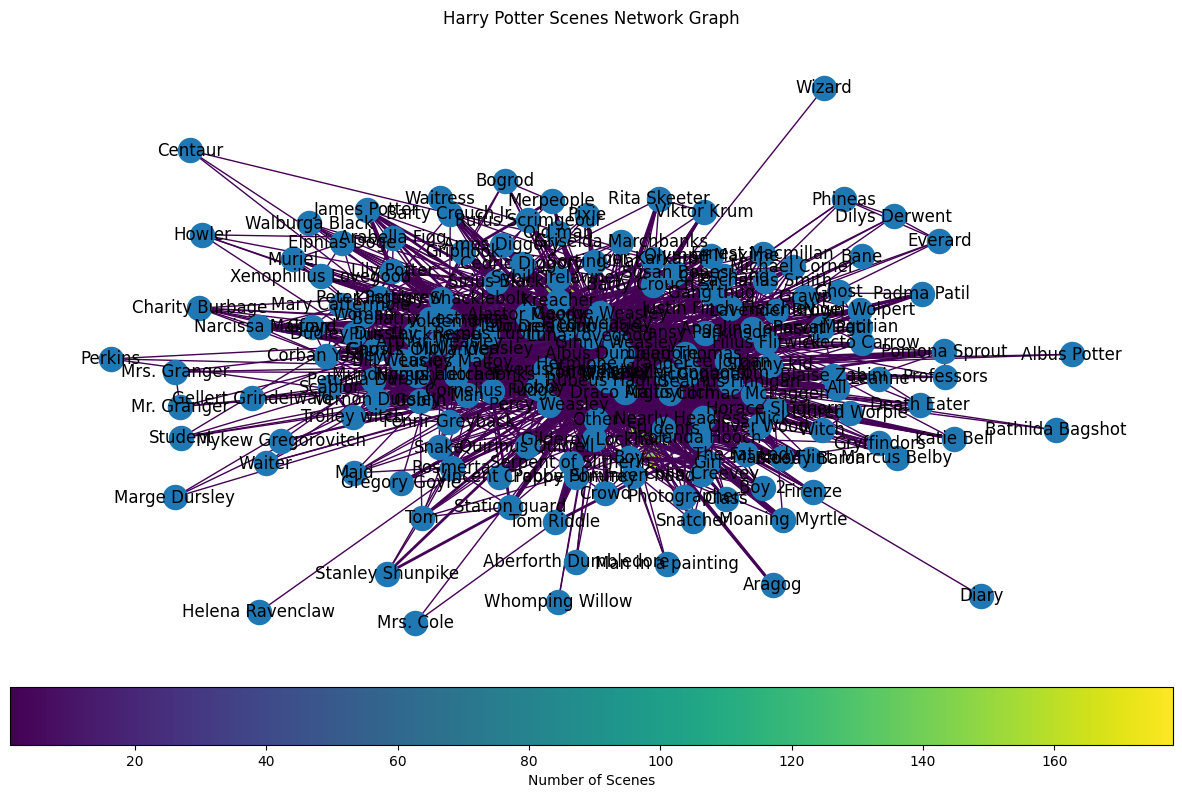

In [11]:
import numpy as np
import networkx as nx
import matplotlib as mpl
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

np.random.seed(123)

# initialize empty graph object
scene_network = nx.Graph()

# add nodes, edges, and weights
scene_network = nx.from_pandas_edgelist(final_df, 'character1', 'character2', edge_attr=True)

weights = [edata['scenes'] for f, t, edata in scene_network.edges(data = True)]

fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(scene_network, seed = 2345)
nx.draw_networkx(scene_network, pos, width = weights, edge_color = weights, with_labels=True)
plt.title("Harry Potter Scenes Network Graph")
plt.axis('off')

norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Number of Scenes')

plt.show()

Very interesting to look at -- what if we tried using dialogue as weight?

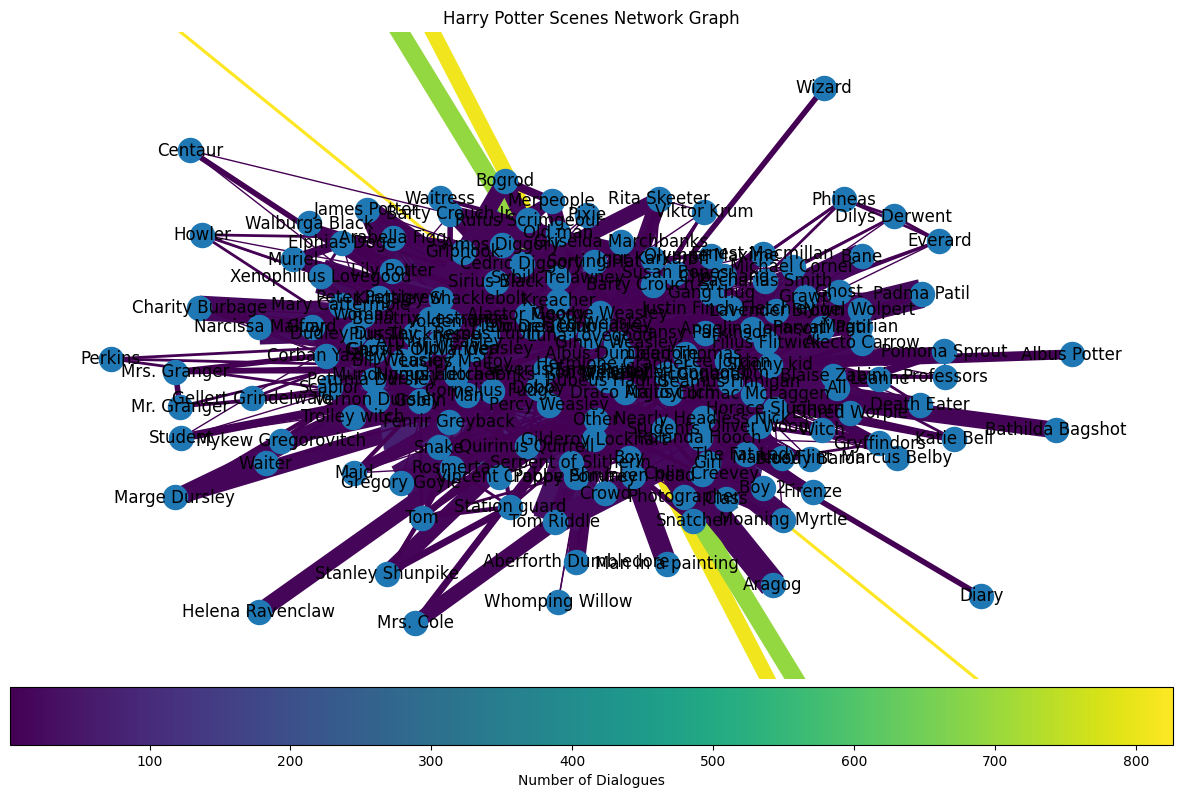

In [12]:
weights = [edata['dialogue'] for f, t, edata in scene_network.edges(data = True)]

fig, ax = plt.subplots(figsize=(15, 10))
nx.draw_networkx(scene_network, pos, width = weights, edge_color = weights, with_labels=True)
plt.title("Harry Potter Scenes Network Graph")
plt.axis('off')

# Create a colorbar
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Number of Dialogues')

plt.show()

Definitely a lot more going on -- let's try to clean these graphs up!

### Network Analysis

Looking at the different subsets created from our `final_dialogue` data frame, moving forward, it makes the sense to use the `by_chapter_place` dataframe (**see below**) for network analysis. The `final_df` dataframe used previously is not easily separated into nodes, edges and weight because there are two character columns (*'character1'*, *'character2'*). Having one column for the characters like we see in `by_chapter_place` will facilitate looking at projections and further manipulating the data.
<img src="by_chapter.png" title="by_chapter_place_df" width="400">
In this section, I will examine the characters that have scenes/chapters in common as well as dialogue. This will tell us which characters have the most presence in the movie, and measures the influence of their network. In addition, I will be performing and examining centrality measures. 

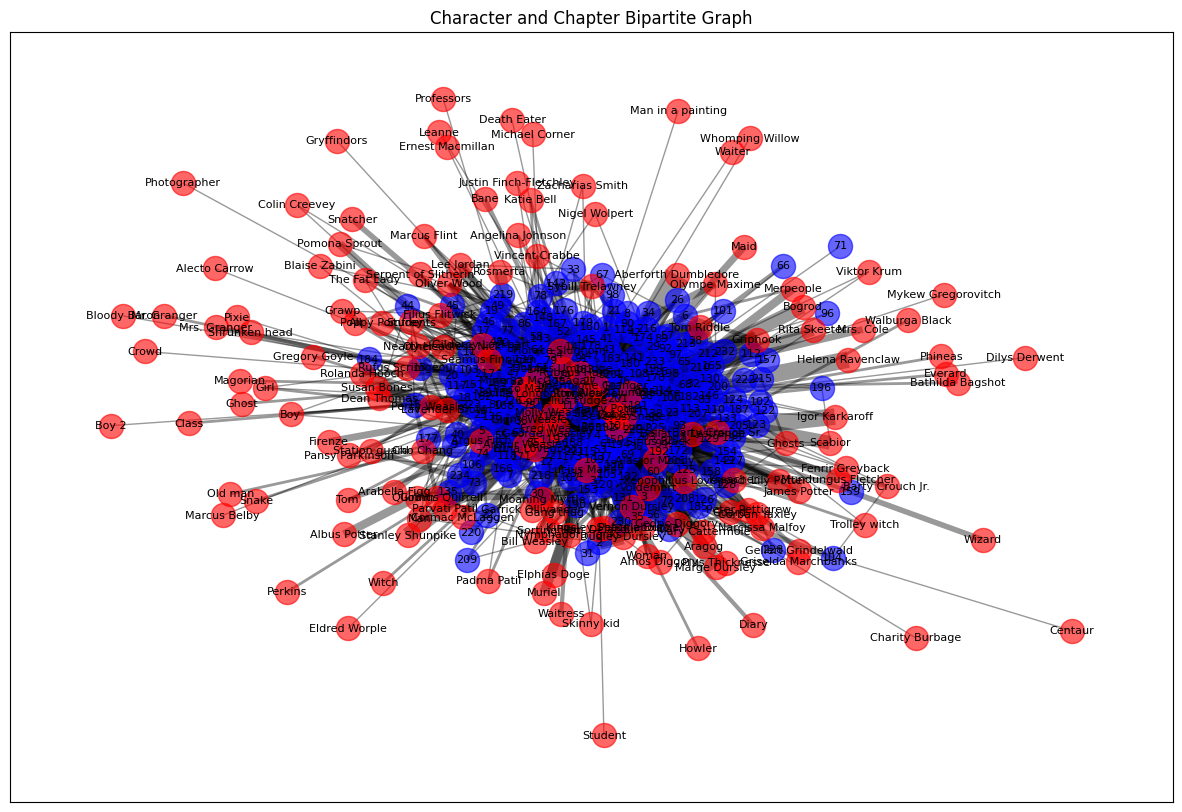

In [13]:
# Create an empty graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(by_chapter_place['chapter_id'].unique(), bipartite=0)
B.add_nodes_from(by_chapter_place['character1'].unique(), bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_weighted_edges_from(
    [(row['character1'], row['chapter_id'], row['dialogue']) for idx, row in by_chapter_place.iterrows()]
)

# Calculate edge weights
weights = [edata['weight'] for f, t, edata in B.edges(data=True)]

# Separate by group
chapter_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"]==0}
character_nodes = set(B) - chapter_nodes

# Create a spring layout for the bipartite graph B
pos_B = nx.spring_layout(B, seed = 30)

# Plot the bipartite graph using the spring layout with node labels
plt.figure(figsize=(15, 10))

# Draw nodes and edges separately in order to color nodes differently 
# based on the 'bipartite' attribute (0: chapters, 1: characters)
nx.draw_networkx_nodes(B, pos_B, nodelist=chapter_nodes, node_color='blue', node_size=300, alpha=0.6)
nx.draw_networkx_nodes(B, pos_B, nodelist=character_nodes, node_color='red', node_size=300, alpha=0.6)
nx.draw_networkx_edges(B, pos_B, width=weights, alpha=0.4)

# Draw the node labels
nx.draw_networkx_labels(B, pos_B, font_size=8)

plt.title("Character and Chapter Bipartite Graph")
plt.show()

Now that we created our bipartite graph object, we will perform the following functions and place them in a dataframe:
- **bipartite.projected_graph**: Stored in `C_pg`, this will create an edge if two characters share atleast a scene together. This look at the number of unique characters that a character has shared a scene with.
<br>*For ex: if character A has a unweighted projection degree of 40, it means they have shared a scene with atleast 40 unique characters.* 
- **bipartite.weighted_projected_graph**: Stored in `C_wpg`, this will create an edge that adds the total scenes that a character has shared with other characters. 
<br>*For ex: if Harry Potter has 2 scenes with Hermoine and 3 with Ron, Harry will have a weighted projection degree of 5.* 

In [14]:
# Project bipartite graph onto character nodes
C_pg = bipartite.projected_graph(B, character_nodes)

# Project bipartite graph onto character nodes keeping number of co-occurrences (i.e., shared chapters)
# The degree computed is weighted and counts the total number of shared chapters
C_wpg = bipartite.weighted_projected_graph(B, character_nodes)

# Initializing a list; this will hold a list of lists
# It will look like: [[name, # of friends, # of shared chapters], ...]
characters_chapters = []

for c in character_nodes:
    # For each character, append [name, # of connected characters, # of shared chapters] into characters_chapters
    characters_chapters.append([c, C_pg.degree(c), C_wpg.degree(c, weight = 'weight')])

# Create the dataframe with the data in characters_chapters
characters_df = pd.DataFrame(characters_chapters, columns = ['name', 'connected_characters', 'shared_chapters'])

# Output the newly made dataframe sorted by the number of connected characters and shared chapters
characters_df.sort_values(by = ['connected_characters', 'shared_chapters'], ascending = False)


name  connected_characters  shared_chapters
2          Harry Potter                   161             1173
90          Ron Weasley                   142              915
17     Hermione Granger                   140              867
65   Neville Longbottom                    86              313
99        Rubeus Hagrid                    74              270
..                  ...                   ...              ...
13     Bathilda Bagshot                     2                2
53         Albus Potter                     2                2
153     Whomping Willow                     2                2
8      Helena Ravenclaw                     1                1
163              Wizard                     1                1

[166 rows x 3 columns]

Looking back at the characters with the most dialogue overall (**see below**), we can see that four of them make an appearances here in the top five in this data frame: **Harry**, **Ron**, **Hermoine**, and **Hagrid**.
<img src="final_dialogue.png" title="by_chapter_place_df" width="400">
**Harry Potter** has had atleast a scene with 161 of the 166 characters in the films and a total of 1173 shared scenes with different charactors. It makes sense given that he is the main protagonist of the story. Similarly, because **Ron**, **Hermoine** and **Hagrid** are close alies, I expected them to be at the top of this list. I was surprised to see **Neville**, instead of **Dumbledore**. An explaination as to why he interacts with less unique characters could be because of Dumbledore's high status within the Hogwarts school and key events in the story.

In [15]:
characters_df.sort_values(by = ['connected_characters', 'shared_chapters'], ascending = False).head(30)

name  connected_characters  shared_chapters
2            Harry Potter                   161             1173
90            Ron Weasley                   142              915
17       Hermione Granger                   140              867
65     Neville Longbottom                    86              313
99          Rubeus Hagrid                    74              270
42           Draco Malfoy                    73              244
124          Fred Weasley                    71              231
7           Severus Snape                    71              210
136        George Weasley                    69              215
114      Albus Dumbledore                    68              295
15          Ginny Weasley                    68              205
118    Minerva McGonagall                    64              231
58              Voldemort                    60              155
110       Seamus Finnigan                    59              186
148        Arthur Weasley                    54              136
111         Luna Lovegood                    53              128
146           Remus Lupin                    49              146
35          Percy Weasley                    41               73
48               Students                    40              109
45            Argus Filch                    40               95
126      Dolores Umbridge                    40               69
5           Alastor Moody                    39              109
81                  Other                    37               92
64        Cornelius Fudge                    35               78
71          Lucius Malfoy                    35               76
158           Dean Thomas                    35               71
57    Bellatrix Lestrange                    33               76
165         Molly Weasley                    32               93
140  Kingsley Shacklebolt                    31               60
112       Filius Flitwick                    31               55

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([165.5, 165.6, 165.7, 165.8, 165.9, 166. , 166.1, 166.2, 166.3,
        166.4, 166.5]),
 <BarContainer object of 10 artists>)

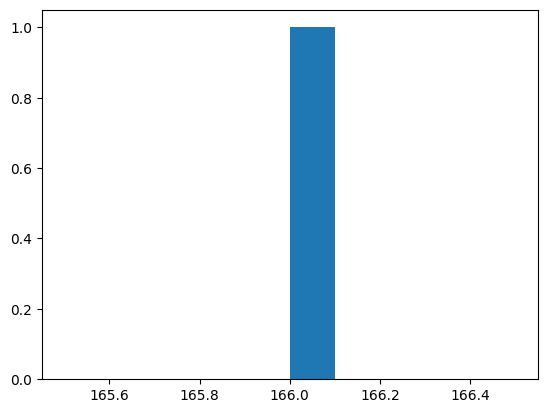

In [16]:
x=[len(c) for c in nx.connected_components(C_wpg)]
plt.hist(x)

This tells us that our graph has single component of around 166. This tell us that all the nodes are connected together.

Below we will utilize the `island_method` to reduce the complexity of the graph and give us different connected components based on different weights or strength of co-occurance of characters between scenes/chapters.



In [17]:
# SNA function for trimming edges
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    edges = []

    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            edges.append([f, to, edata['weight']])
        
    g2.add_weighted_edges_from(edges)
    return g2

# SNA function for island method
def island_method(g, iterations = 5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]

    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)

    return[[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [18]:
character_islands = island_method(C_wpg)

for i in character_islands:
    print(i[0], nx.number_of_nodes(i[1]), nx.number_connected_components(i[1]))

1 111 1
29 8 1
57 3 1
85 3 1
113 3 1
141 2 1


The `island_method` function generated islands of give five different weights. These represent the relationship between characters based on the number of chapters they share. So for ex, the first line tells us there are 111 characters that have atleast one character connection in a chapter and forms a single connected component.Below we will see the characters that meet each threshold.

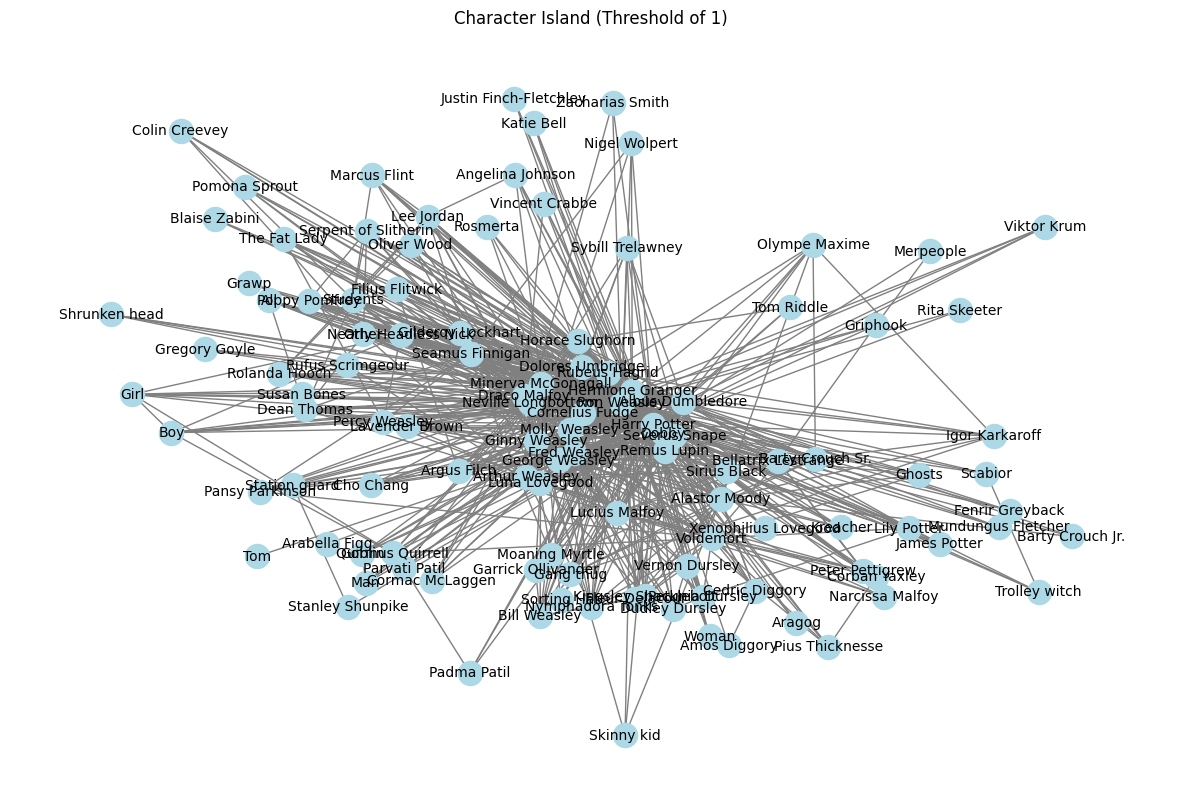

In [19]:
plt.figure(figsize=(15,10))

nx.draw_networkx(character_islands[0][1], pos_B, node_size=300, font_size=10, node_color='lightblue', edge_color='grey')

plt.title("Character Island (Threshold of 1)")
plt.axis("off")
plt.show()

Here we can see characters that have atleast one character connection.

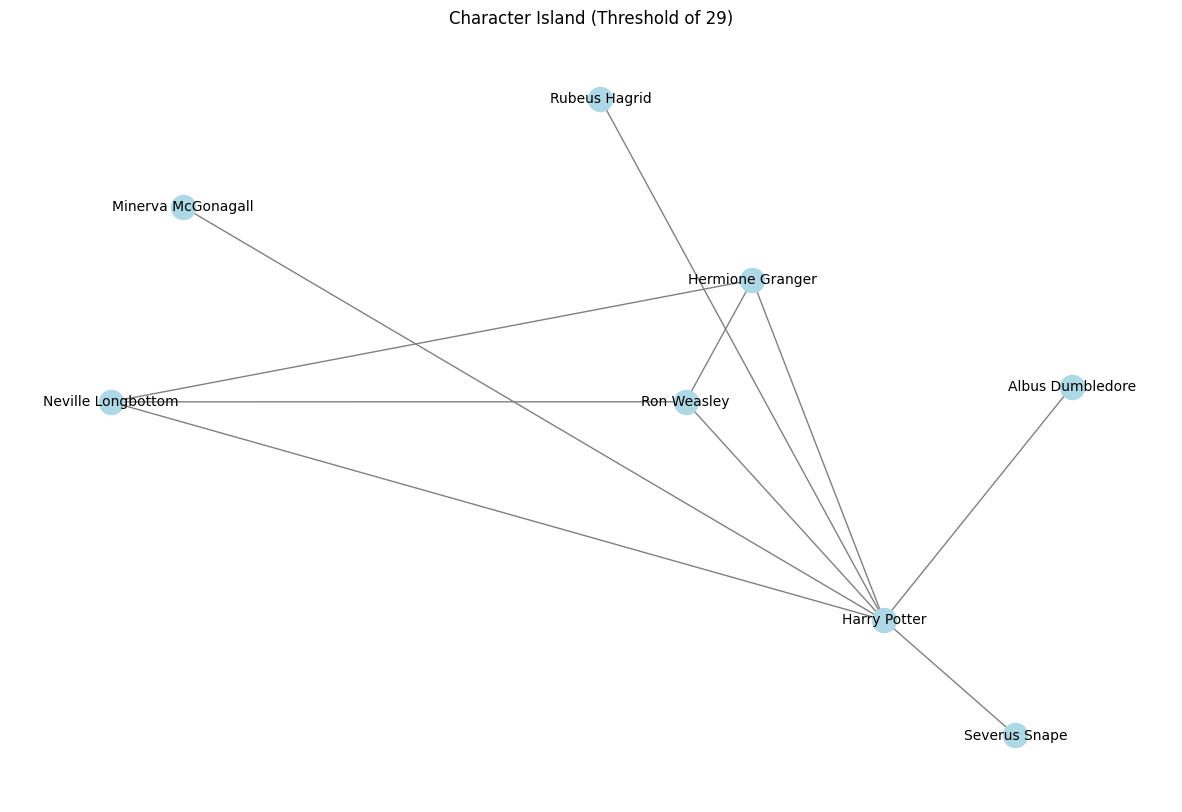

In [20]:
plt.figure(figsize=(15,10))
nx.draw_networkx(character_islands[1][1], pos_B, node_size=300, font_size=10, node_color='lightblue', edge_color='grey')

plt.title("Character Island (Threshold of 29)")
plt.axis("off")
plt.show()

In the threshold of 29 shared chapters, we can see **Harry**, **Ron**, and **Hermoine** at the center, alongside other supporting instructors at the school like **Dumbledore** and **Prof McGonagall**. We can also see their classmate **Neville Longbottom** in the chart.

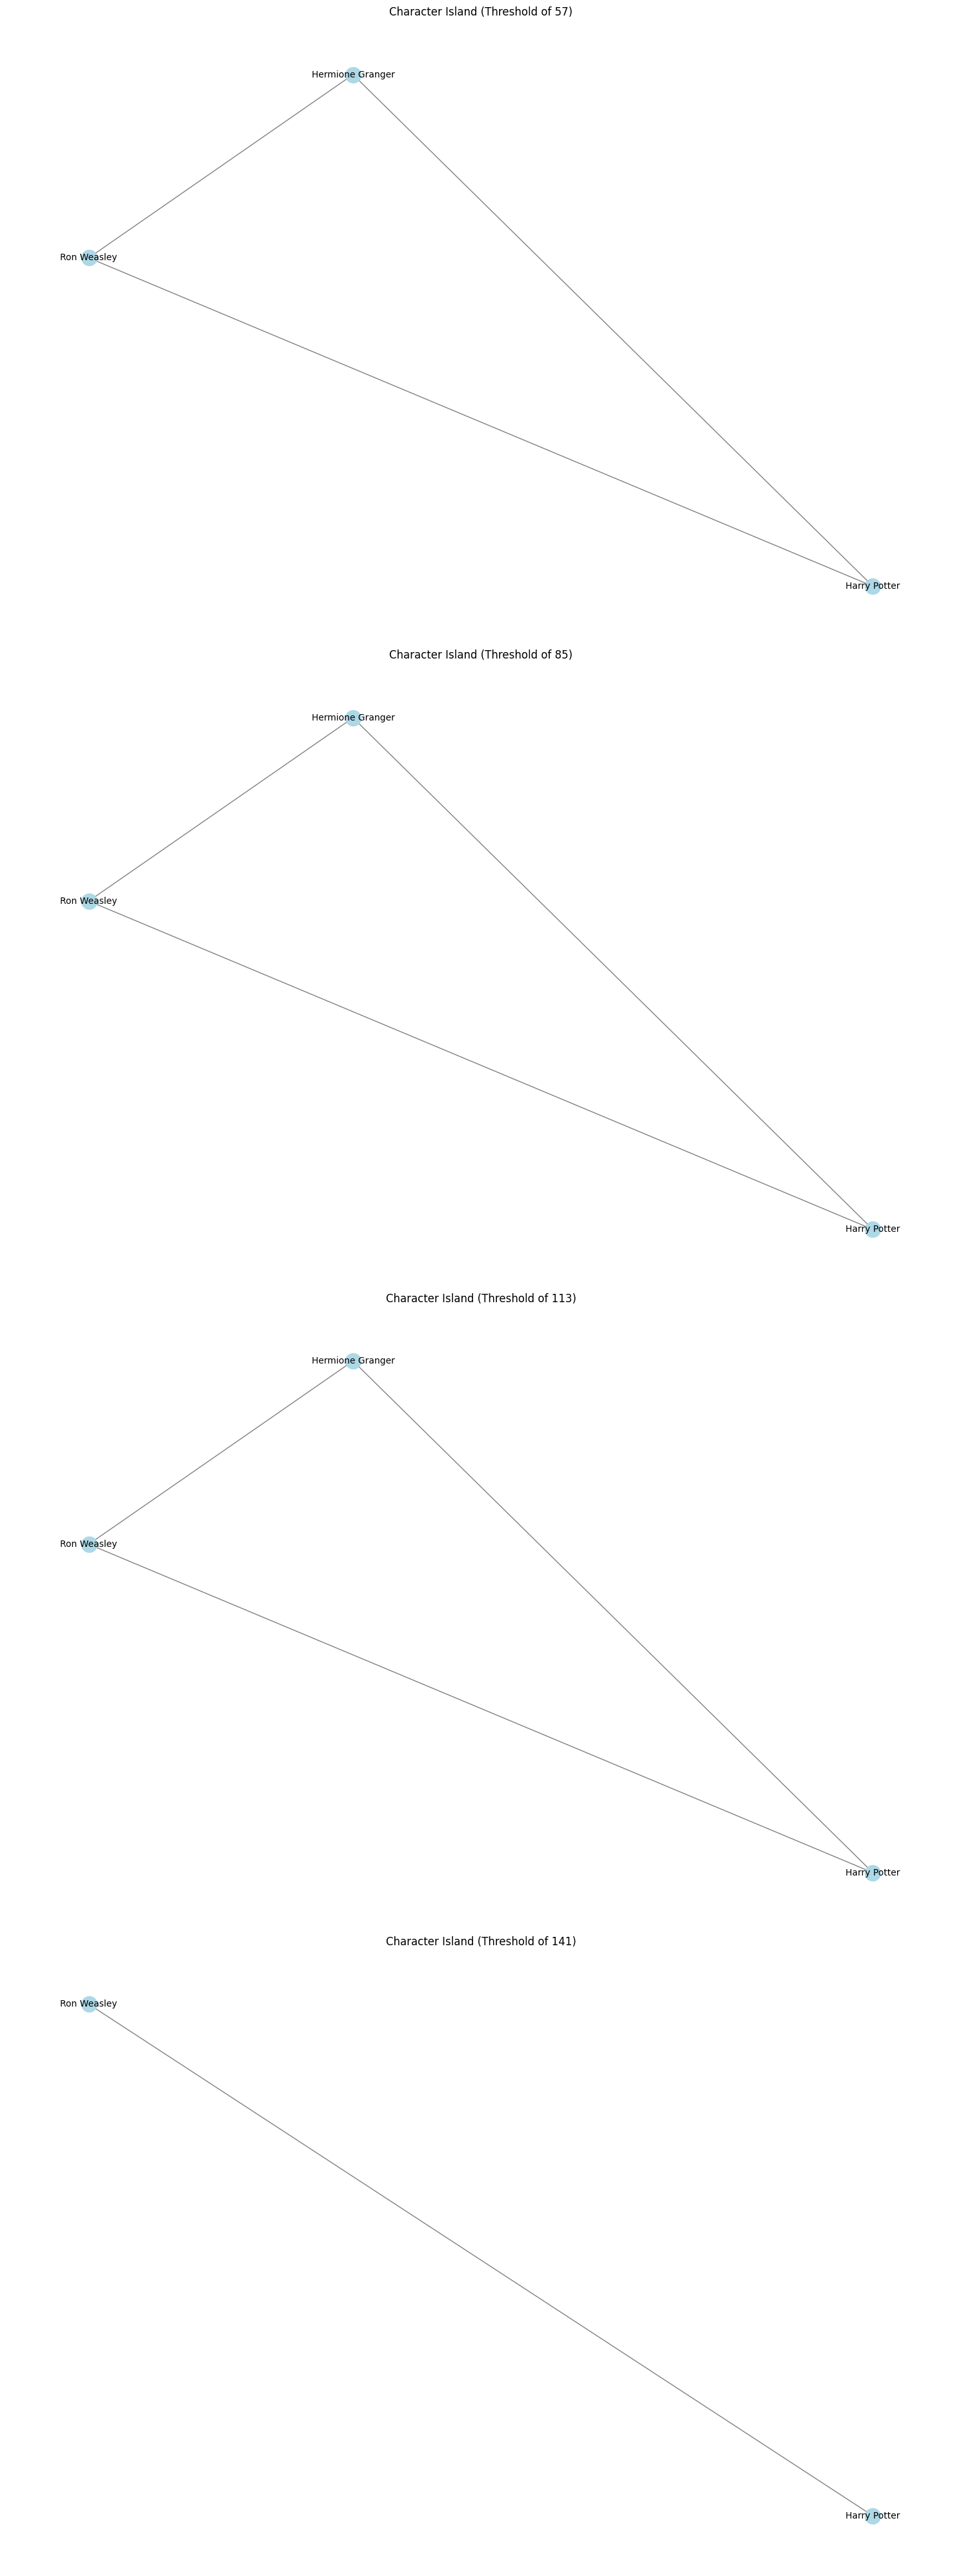

In [21]:
fig, axes = plt.subplots(nrows=4, figsize=(15, 40))

islands_to_print = [2, 3, 4, 5]  # Islands to be printed

for i, ax in enumerate(axes):
    island_idx = islands_to_print[i]
    island, graph = character_islands[island_idx]
    
    nx.draw_networkx(graph, pos_B, node_size=300, font_size=10, node_color='lightblue', edge_color='grey', ax=ax)
    ax.set_title(f"Character Island (Threshold of {island})")
    ax.axis("off")

plt.tight_layout()
plt.show()

In the final island threshold of 57, 85, 113 and 141 we can see the golden trio of **Harry**, **Ron** and **Hermoine** in most of them.

In [22]:
# function where you enter a graph and it creates a dataframe of centrality
def centrality(graph):
    # calculate each of the values for each node
    degree = nx.degree(graph)
    degree_weighted = nx.degree(graph, weight = 'weight')
    degree_c = nx.degree_centrality(graph)
    between_c = nx.betweenness_centrality(graph)
    closeness_c = nx.closeness_centrality(graph)
    eigen_c = nx.eigenvector_centrality(graph, weight = 'weight') 

    # create a list for each node with all the data points
    data = [[name
             , degree[name]
             , degree_weighted[name]
             , round(degree_c[name], 3)
             , round(between_c[name], 3)
             , round(closeness_c[name], 3)
             , round(eigen_c[name], 3)] 
             for name in graph.nodes()]
    
    # turn this into a dataframe
    centrality_df = pd.DataFrame(data
                                 , columns = ['name', 'degree', 'weighted_degree', 'degree centrality'
                                              , 'betweenness', 'closeness', 'eigenvector'])
    
    # return the dataframe
    return centrality_df

centrality(C_wpg).sort_values(by = ['degree', 'eigenvector'], ascending = False)

name  degree  weighted_degree  degree centrality  \
2          Harry Potter     161             1173              0.976   
90          Ron Weasley     142              915              0.861   
17     Hermione Granger     140              867              0.848   
65   Neville Longbottom      86              313              0.521   
99        Rubeus Hagrid      74              270              0.448   
..                  ...     ...              ...                ...   
13     Bathilda Bagshot       2                2              0.012   
53         Albus Potter       2                2              0.012   
153     Whomping Willow       2                2              0.012   
8      Helena Ravenclaw       1                1              0.006   
163              Wizard       1                1              0.006   

     betweenness  closeness  eigenvector  
2          0.281      0.976        0.527  
90         0.144      0.878        0.485  
17         0.137      0.868        0.467  
65         0.030      0.676        0.173  
99         0.024      0.645        0.162  
..           ...        ...          ...  
13         0.000      0.500        0.003  
53         0.000      0.500        0.003  
153        0.000      0.500        0.003  
8          0.000      0.495        0.001  
163        0.000      0.495        0.001  

[166 rows x 7 columns]

The `centrality` function creates a dataframe which contains various centrality measure including some of that we saw before:
- `name`: This is the name of the node or character
- `degree`: The number of unique characters that the person has shared a chapter with
- `weight_degree`: The total chapters that a character shares with other characters
- `degree centrality`The proportion of other characters a character shares at least a chapter with
- `betweenness`: The extended to which a character connects other characters who do not share chapters directly
- `closeness`: How close a character is to all other characters in terms of shared chapters
- `eigenvector`: This tell us the influence a character has based on who they connect with

**Harry** scores the highest in all the measures. He shared shares chapters with almost all the characters in the movies, shares a large number of chapters, is highly connected with other well-connected characters and serves as a bridge between other characters who do not directly share chapters. **Ron** and **Hermoine** score high similarly. **Neville** and **Hagrid's** has a lower weighted degree, and eigenvector centrality - they are less often a bridge between characters and are not as connected to influential characters. Though they scored lower compared to the trio, they are still score high relative to the other characters 

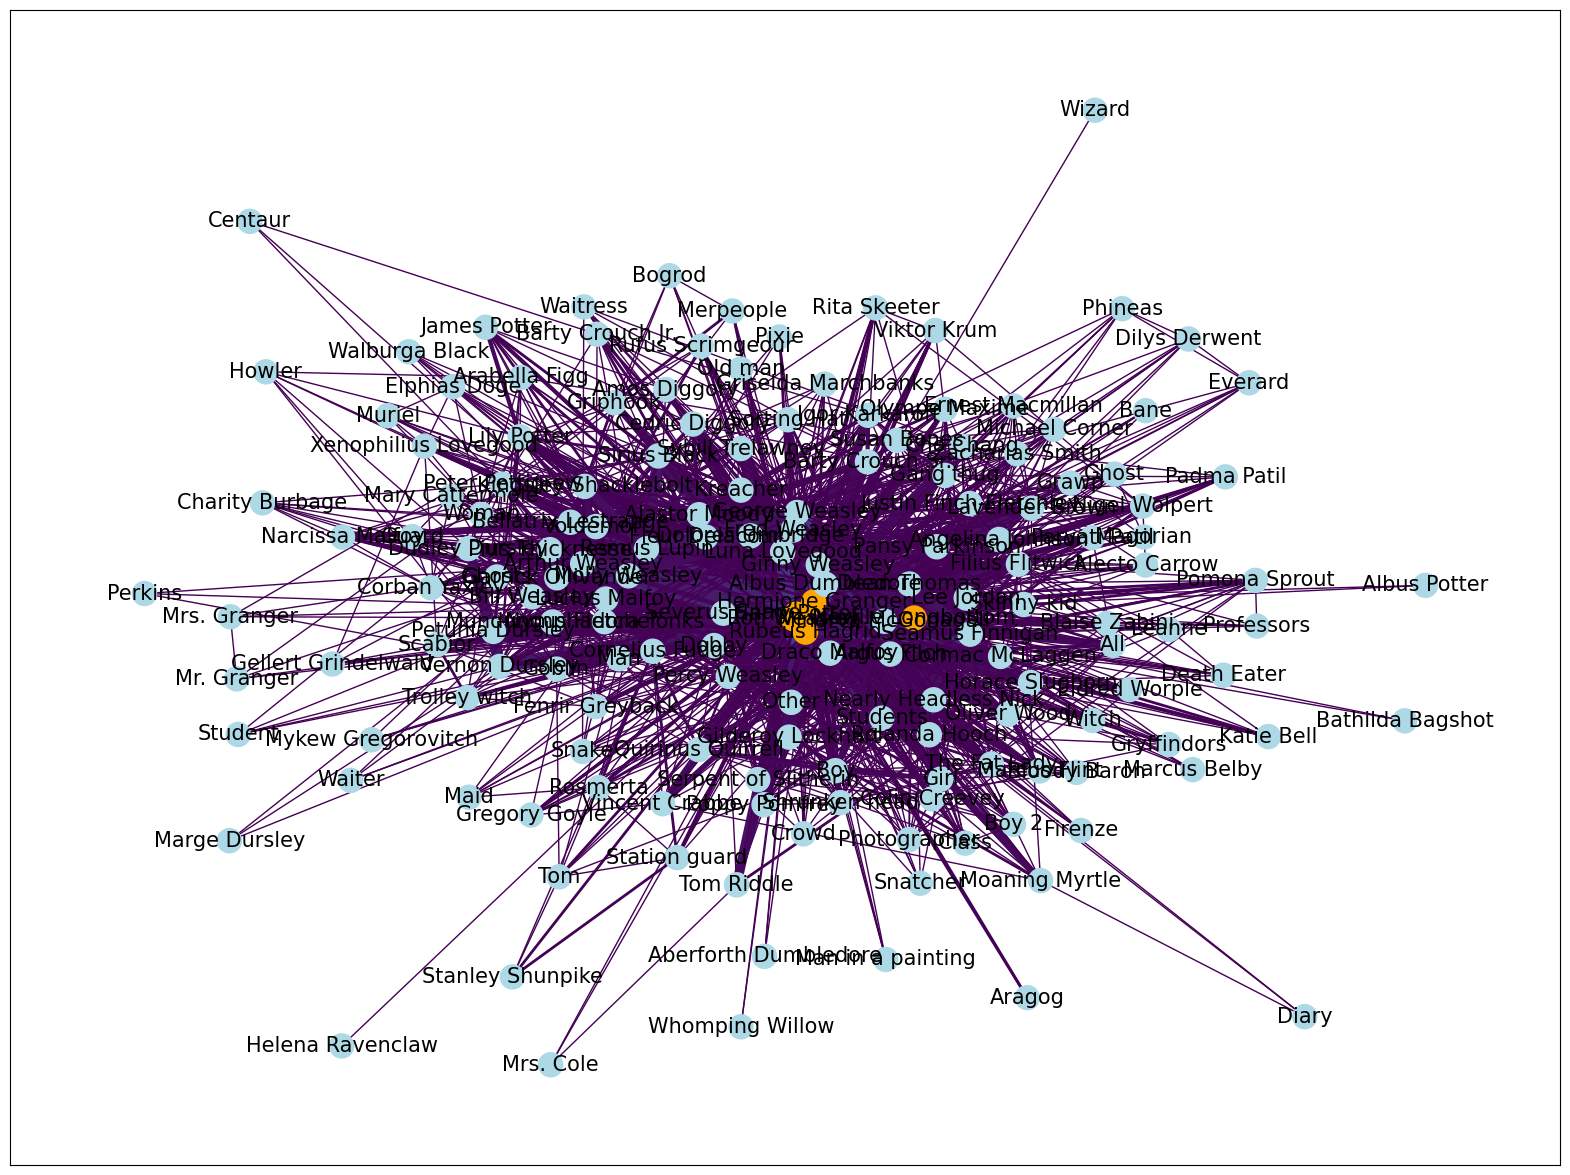

In [23]:
# Project relationships onto the character nodes

# create a list of top five characters
top_five_characters = ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Neville Longbottom', 'Rubeus Hagrid']  # replace with your actual top five

# assign colors to anyone on the llist
colors = ['orange' if node in top_five_characters else 'lightblue' for node in C_wpg.nodes()]  # replace 'red' and 'lightblue' with your desired colors

plt.figure(figsize = (20, 15))
weights = [edata['weight'] for f, t, edata in C_wpg.edges(data = True)]
charplot = nx.draw_networkx(C_wpg, pos, node_color=colors, width=weights, edge_color=weights, font_size=15)


Here we get an alternative view of our bi-partite graph from earlier. This time instead we are plotting the weighted projected graph `C_wpg`. Each character is represented by the nodes, an edge between nodes in this chart, indicates that the characters share atleast a chapter. The top five characters from the `centrality_df` are highlighted in orange - which we can see in the center of the graph.

(array([1.8e+03, 2.9e+01, 6.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.0e+00, 2.0e+00]),
 array([  1. ,  15.3,  29.6,  43.9,  58.2,  72.5,  86.8, 101.1, 115.4,
        129.7, 144. ]),
 <BarContainer object of 10 artists>)

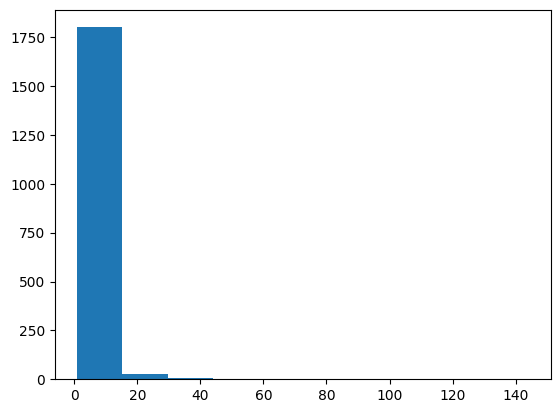

In [24]:
plt.hist(weights)

In this histogram we can see the distribution of the edge weights in our graph. This shows us the amount of scenes shared among characters. We can see that most pairs of characters share between 1 and 3 chapters together.

In [25]:
# function to filter our graph
def filter_graph(G, threshold):
    # initialize new graph
    new_graph = nx.Graph()
    # for each edge
    for edge in G.edges(data = True):
        # find the to and from nodes
        f = edge[0]
        to = edge[1]
        # find the weight
        w = edge[2]['weight']
        # if this edge's weight is above or equal to the given threshold
        if w >= threshold:
            # add this edge to the new graph
            new_graph.add_edge(f, to, weight = w)
    # return the new graph comprised of edges that pass our threshold
    return new_graph

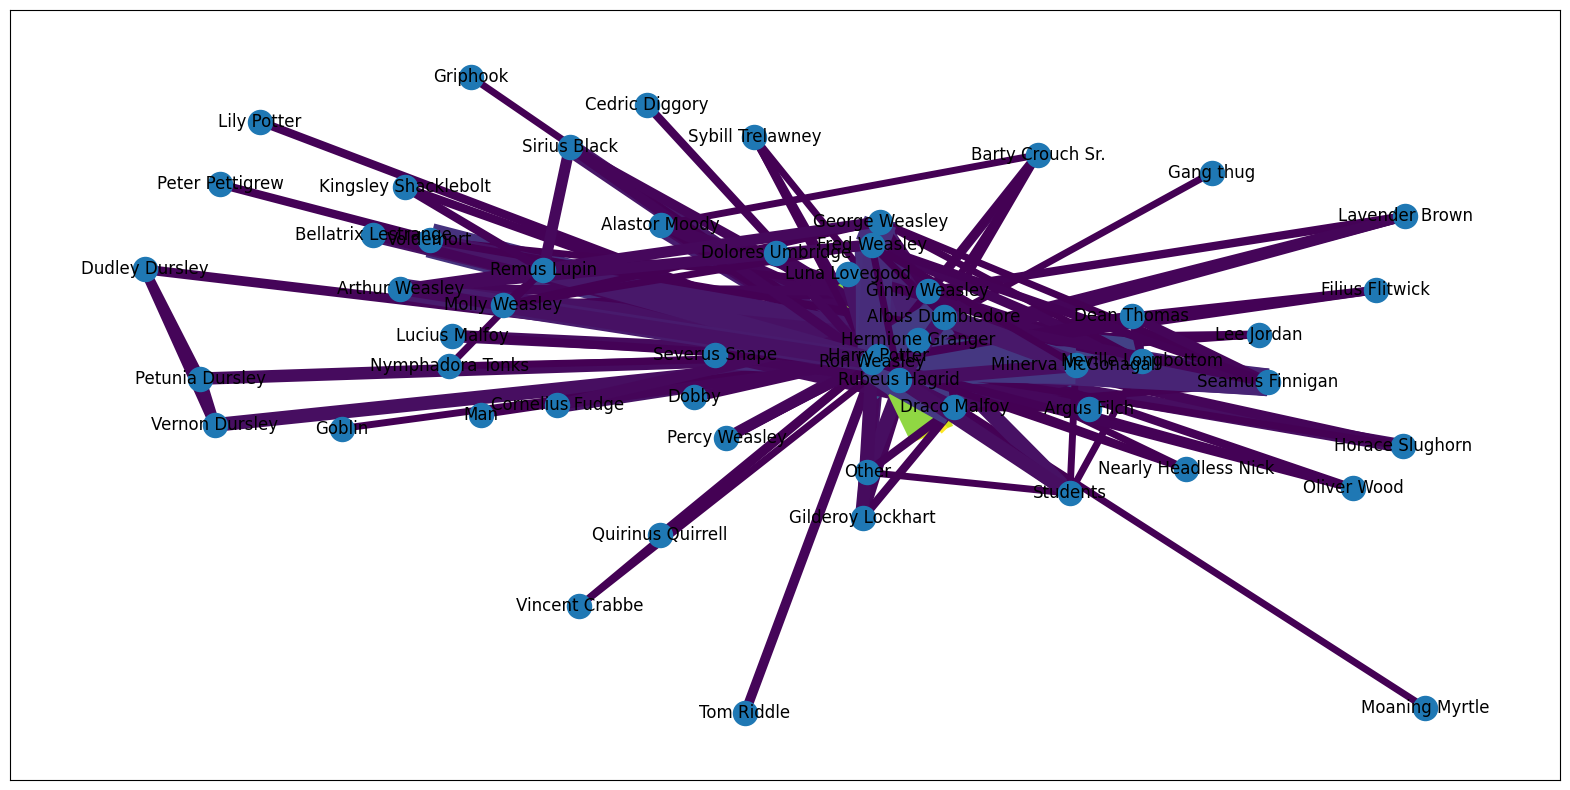

In [26]:
plt.figure(figsize = (20, 10))
filtered = filter_graph(C_wpg, 5)
weights = [edata['weight'] for f, t, edata in filtered.edges(data = True)]
nx.draw_networkx(filtered, pos, width=weights, edge_color = weights)

When we filter for characters that share atleast five chapters together, we see other interesting characters outside of the main protagonists, such as the central villians in the story like **Voldemort**, and **Bellatrix Lestrange**.

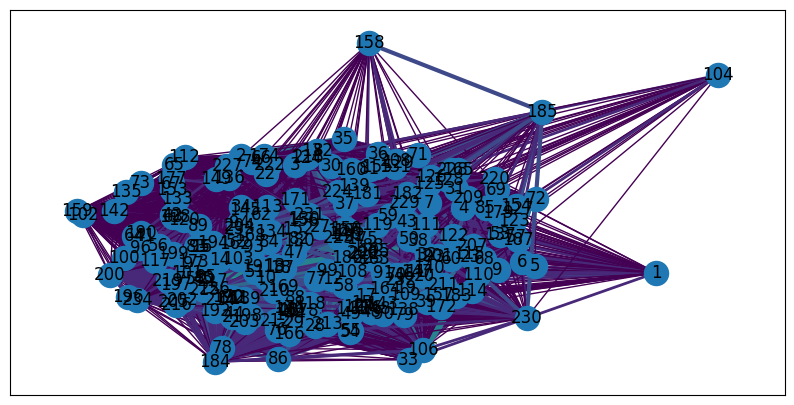

In [27]:
Chap_wpg = bipartite.weighted_projected_graph(B, chapter_nodes)
pos_chap = nx.spring_layout(Chap_wpg, seed=42)  # Compute positions for Chap_wpg
weights_chap = [edata['weight'] for f, t, edata in Chap_wpg.edges(data=True)]  # Compute weights for Chap_wpg

plt.figure(figsize = (10, 5))
nx.draw_networkx(Chap_wpg, pos_chap, width=weights_chap, edge_color=weights_chap)


In [28]:
centrality(Chap_wpg).sort_values(by = ['degree', 'eigenvector'], ascending = False)

name  degree  weighted_degree  degree centrality  betweenness  closeness  \
224   225     233              627              1.000        0.001      1.000   
187   188     232              717              0.996        0.000      0.996   
81     82     232              676              0.996        0.000      0.996   
18     19     232              654              0.996        0.000      0.996   
46     47     232              665              0.996        0.000      0.996   
..    ...     ...              ...                ...          ...        ...   
105   106     166              267              0.712        0.000      0.777   
0       1      94              123              0.403        0.000      0.626   
184   185      70               99              0.300        0.000      0.588   
157   158      41               46              0.176        0.000      0.548   
103   104      33               36              0.142        0.000      0.538   

     eigenvector  
224        0.084  
187        0.098  
81         0.093  
18         0.091  
46         0.091  
..           ...  
105        0.039  
0          0.017  
184        0.011  
157        0.006  
103        0.004  

[234 rows x 7 columns]

The setting of four out of the top five chapters takes place in Hogwarts school. The location and chapters are 255 (The Boathouse - Hogwarts), 82 (Griffindor Commonn Room - Hogwarts), 19 (Great Hall - Hogwarts), and 42 (the Corridors - Hogwarts). It makes sense given that A majority of the characters and important story events are connected to the school. All the locations in the top five have a high degree centrality which means they have share connections in almost all other chapters. The weighted degree vary slightly which means they don't share the same number of characters with other chapters. The eigenvecot values are high which means these chapters are connected to other well-connected chapters.

### Sentiment/Lexical Analysis

Now that we know who the main/most connected characters are, let's see what they talk about.

In order to do the word analysis, we need to first tokenize the text so that we can look at their frequencies in the dialogue. To do this, we will use the **NLTK** library.

In [29]:
import nltk
import re

# clean some of the lines and remove possessives
def clean_line(line):
    new_line = re.sub('\.\.\.', ' ', line)
    new_line = re.sub('\'s', '', new_line)

    if 'You-Know-Who' not in new_line:
        new_line = new_line.replace('-', ' ')
    
    return new_line

final_dialogue['dialogue'] = final_dialogue['dialogue'].apply(clean_line)

First, let's take a look at the frequency of one-grams in the text. 

In [30]:
def tokenizer(text):
    tokens = nltk.WordPunctTokenizer().tokenize(text.lower())
    return tokens

final_dialogue['tokenized_dialogue'] = final_dialogue['dialogue'].apply(tokenizer)

final_dialogue.head()

dialogue_id                               movie_title  chapter_id  \
0            1  Harry Potter and the Philosopher's Stone           1   
1            2  Harry Potter and the Philosopher's Stone           1   
2            3  Harry Potter and the Philosopher's Stone           1   
3            4  Harry Potter and the Philosopher's Stone           1   
4            5  Harry Potter and the Philosopher's Stone           1   

        chapter_name      place_name place_category      character_name  \
0  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
1  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
2  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
3  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
4  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   

        house                                           dialogue  \
0  Gryffindor  I should have known that you would be here Pro...   
1  Gryffindor  Good evening, Professor Dumbledore. Are the ru...   
2  Gryffindor   I'm afraid so, Professor. The good, and the bad.   
3  Gryffindor                                       And the boy?   
4  Gryffindor                            Hagrid is bringing him.   

                                  tokenized_dialogue  
0  [i, should, have, known, that, you, would, be,...  
1  [good, evening, ,, professor, dumbledore, ., a...  
2  [i, ', m, afraid, so, ,, professor, ., the, go...  
3                                 [and, the, boy, ?]  
4                     [hagrid, is, bringing, him, .]

Now let's remove punctuation and stopwords from the tokenized text.

In [31]:
# get stopwords from NLTK
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['i\'m', 'i\'ll', 'i\'ve'])

# get a list of punctuation
from string import punctuation
punct = list(punctuation)

def unique_tokens(list):
    unique = [token.lower() for token in list if token not in punct and token not in stopwords]
    return(unique)

final_dialogue['tokenized_dialogue'] = final_dialogue['tokenized_dialogue'].apply(unique_tokens)

final_dialogue.head()

dialogue_id                               movie_title  chapter_id  \
0            1  Harry Potter and the Philosopher's Stone           1   
1            2  Harry Potter and the Philosopher's Stone           1   
2            3  Harry Potter and the Philosopher's Stone           1   
3            4  Harry Potter and the Philosopher's Stone           1   
4            5  Harry Potter and the Philosopher's Stone           1   

        chapter_name      place_name place_category      character_name  \
0  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
1  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
2  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
3  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
4  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   

        house                                           dialogue  \
0  Gryffindor  I should have known that you would be here Pro...   
1  Gryffindor  Good evening, Professor Dumbledore. Are the ru...   
2  Gryffindor   I'm afraid so, Professor. The good, and the bad.   
3  Gryffindor                                       And the boy?   
4  Gryffindor                            Hagrid is bringing him.   

                                  tokenized_dialogue  
0              [known, would, professor, mcgonagall]  
1  [good, evening, professor, dumbledore, rumours...  
2                     [afraid, professor, good, bad]  
3                                              [boy]  
4                                 [hagrid, bringing]

Now let's create a list of all the tokenized words and look at the frequencies which they appear in the text.

In [32]:
def combine_tokens(column):
    combined_tokens = []

    for token_list in list(column):
        for word in token_list:
            combined_tokens.append(word)

    return combined_tokens

full_tokens = combine_tokens(final_dialogue['tokenized_dialogue'])

full_tokens[:10]

['known',
 'would',
 'professor',
 'mcgonagall',
 'good',
 'evening',
 'professor',
 'dumbledore',
 'rumours',
 'true']

**How many total unique words are in the dialogue?**

In [33]:
len(full_tokens)

37015

There are 37,015 unique words in the dialogue. 

**Which words account for approximately 50% of the words in the dialogue?**

In [34]:
freq_dist = nltk.FreqDist(full_tokens)

# initiate counter
count = 0
# initiate total number of words
total = 0

for word, freq in freq_dist.most_common():
    total += freq
    if total <= (len(full_tokens)/2): 
        count += 1 # add to counter only if the number of words is still less than
    else:
        break

print(str(count), "words make up approximately half the corpus.")


241 words make up approximately half the corpus.


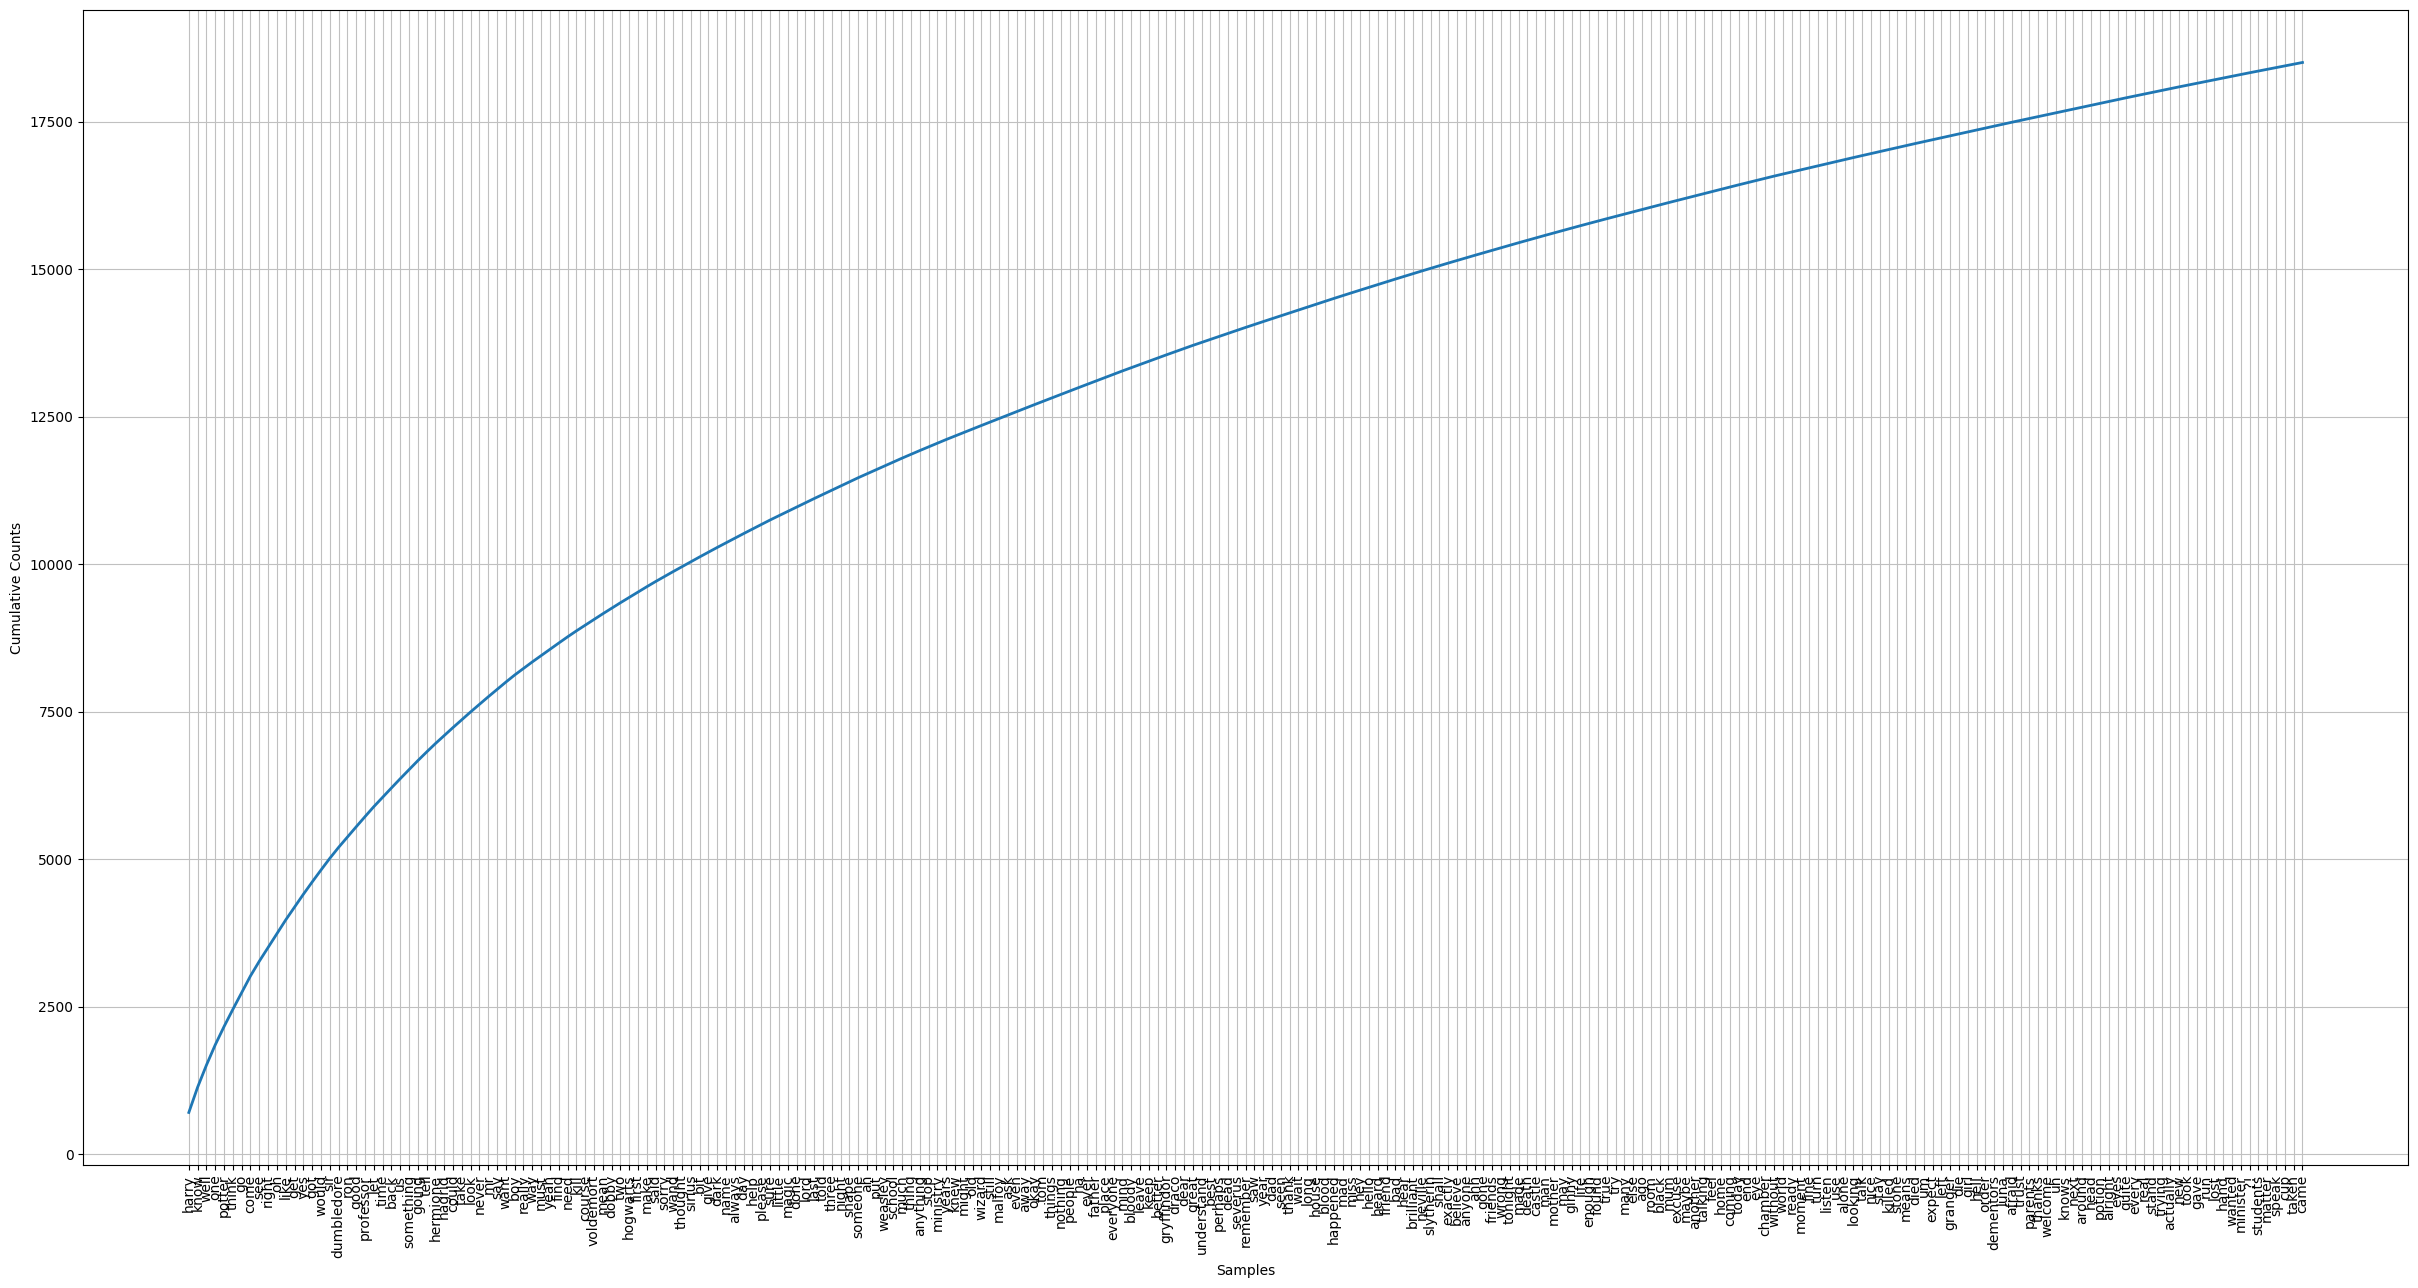

In [35]:
plt.figure(figsize=(30, 15))
freq_dist.plot(241, cumulative=True)
plt.show()

These words account for approximately 50% of the entire dialogue. 

Let's take a look at the top 50 one-grams. 

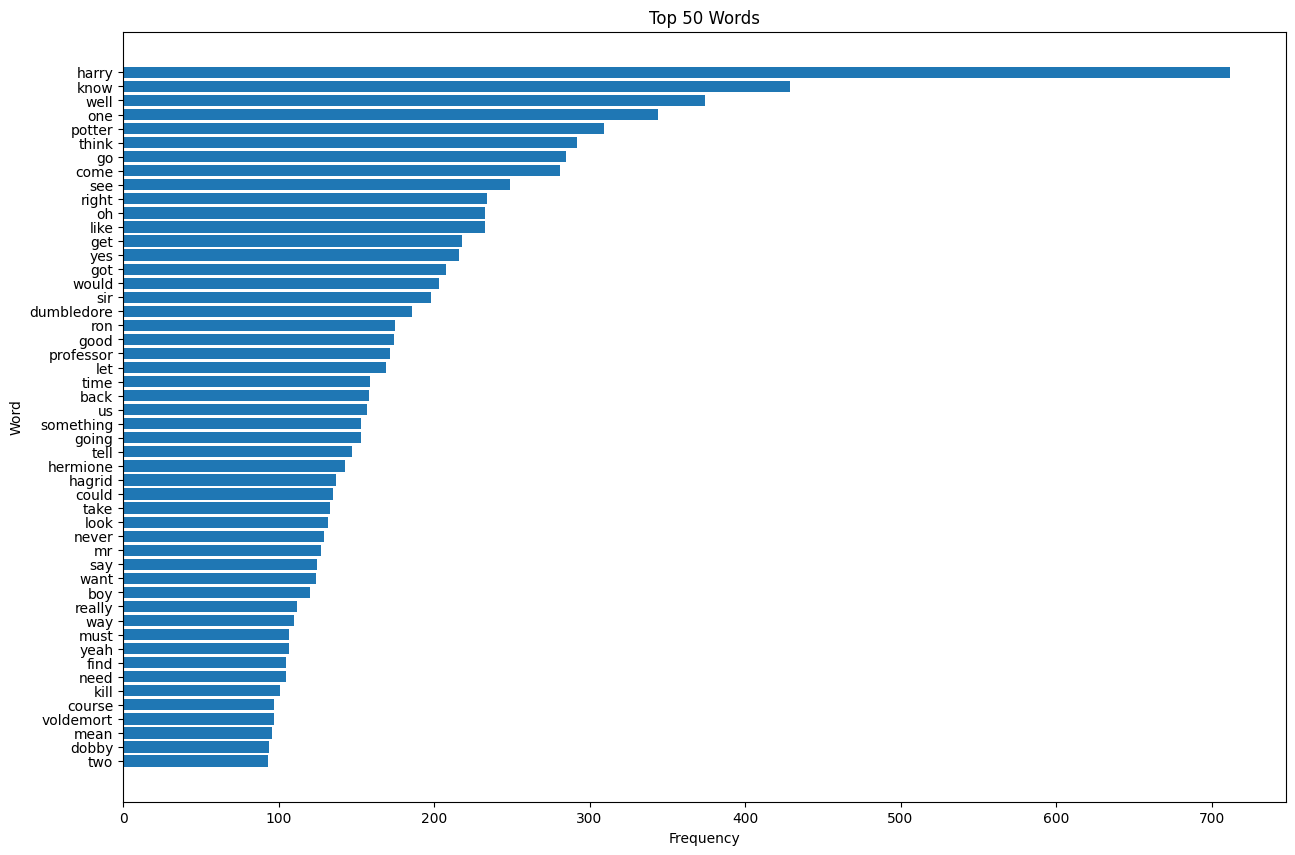

In [36]:
top_50 = freq_dist.most_common(50)

top_50_df = pd.DataFrame(top_50, columns=['word', 'count']).sort_values(by='count')

plt.figure(figsize=(15,10))
plt.barh(top_50_df['word'], top_50_df['count'])

# setting label of y-axis
plt.ylabel("Word")
# setting label of x-axis
plt.xlabel("Frequency")
plt.title("Top 50 Words")
plt.show()


Not surprisingly, Harry, Dumbledore, Ron, Hermione, and Hagrid appear within the top 30. Harry, Ron, and Hermione, being the golden trio, are the main characters of the book, and Dumbledore and Hagrid also appeared in the top 5 characters with the most dialogue. 

Voldemort's name also sticks out within the top 50. Defeating Voldemort is a main theme of the book as well, so it is not surprising that his name should appear often in the text. 

What is slightly surprising is the appearance of Dobby's name also within the top 50, as he is more of a secondary character. How many times does Dobby appear in the text?

In [37]:
from nltk.text import Text

full_text = nltk.Text(full_tokens)

full_text.concordance('dobby', lines = 10)

Displaying 10 of 94 matches:
ha ho ho ho ha ha harry potter honor dobby sir dobby house elf rude anything gr
o ha ha harry potter honor dobby sir dobby house elf rude anything great time h
time house elf bedroom oh oh yes sir dobby understands dobby come tell difficul
room oh oh yes sir dobby understands dobby come tell difficult sir dobby wonder
stands dobby come tell difficult sir dobby wonders begin sit sit sit sit oh oh 
h oh ho oh ho ho oh ho ho ohh ho hoo dobby ssh sorry mean offend anything offen
sh sorry mean offend anything offend dobby dobby heard greatness sir never aske
ry mean offend anything offend dobby dobby heard greatness sir never asked sit 
y decent wizards awful thing say bad dobby stop dobby bad dobby dobby shh baaad
zards awful thing say bad dobby stop dobby bad dobby dobby shh baaad dobby dobb


Dobby is mentioned in the dialogue 94 times. We can see from the outputted text that, even though Dobby may not appear so often in scenes, he refers to himself in the third person and often more than once in a sentence so this would account for the fact that he is mentioned many times. 

**How many times is Voldemort mentioned in the dialogue?**

In [38]:
full_text.concordance('voldemort', lines = 10)

Displaying 10 of 97 matches:
e v name v maybe wrote spell right voldemort voldemort shh !! dark times harry 
 maybe wrote spell right voldemort voldemort shh !! dark times harry dark times
shh !! dark times harry dark times voldemort started gather followers brought e
 decided kill em nobody one except voldemort tried kill yes ordinary cut forehe
hing killed unicorn drinking blood voldemort know hidden school moment philosop
wrong snape want stone wants stone voldemort elixir life voldemort strong come 
 wants stone voldemort elixir life voldemort strong come back comes back think 
te forgetting one thing one wizard voldemort always feared dumbledore long dumb
 strength enough harry potter meet voldemort yes see become see must survive li
ing something mean stone gone mean voldemort never come back ah afraid ways ret


Interestingly, Voldemort and Dobby are mentioned almost the same amount of times in the dialogue. 

A lot of times Voldemort is referred to as "The Dark Lord" or "You-Know-Who." He is also sometimes called by his real name, Tom Riddle. **How many times is he mentioned without the moniker of "Voldemort"?**

In [39]:
full_dialogue = ""

for line in final_dialogue['dialogue']:
    full_dialogue += line + " "

dark_lord = full_dialogue.lower().count("the dark lord")
you_know_who = full_dialogue.lower().count("you-know-who")
tom_riddle = full_dialogue.lower().count("tom riddle")

print("The Dark Lord is mentioned", dark_lord, "times. You-Know-Who is mentioned", you_know_who, "times. Tom Riddle is mentioned", tom_riddle, "times.")

The Dark Lord is mentioned 29 times. You-Know-Who is mentioned 25 times. Tom Riddle is mentioned 20 times.


How does this vary from each movie?

In [40]:
movies = list(final_dialogue['movie_title'].unique())

voldy_mentions = {}

for movie in movies:
    movie_dialogue = ''

    movie_df = final_dialogue[final_dialogue['movie_title'] == movie]
    
    for line in movie_df['dialogue']:
        movie_dialogue += line + " "

    voldy_mentions[movie] = {
        'Voldemort': movie_dialogue.lower().count("voldemort"),
        'The Dark Lord': movie_dialogue.lower().count("the dark lord"),
        'You-Know-Who': movie_dialogue.lower().count("you-know-who"),
        'Tom Riddle': movie_dialogue.lower().count("tom riddle")
    }

pd.DataFrame(voldy_mentions)

Harry Potter and the Philosopher's Stone  \
Voldemort                                            10   
The Dark Lord                                         0   
You-Know-Who                                          2   
Tom Riddle                                            0   

               Harry Potter and the Chamber of Secrets  \
Voldemort                                           13   
The Dark Lord                                        0   
You-Know-Who                                         0   
Tom Riddle                                           6   

               Harry Potter and the Prisoner of Azkaban  \
Voldemort                                             5   
The Dark Lord                                         1   
You-Know-Who                                          5   
Tom Riddle                                            0   

               Harry Potter and the Goblet of Fire  \
Voldemort                                        9   
The Dark Lord                                    4   
You-Know-Who                                     0   
Tom Riddle                                       0   

               Harry Potter and the Order of the Phoenix  \
Voldemort                                             32   
The Dark Lord                                          7   
You-Know-Who                                           7   
Tom Riddle                                             0   

               Harry Potter and the Half-Blood Prince  \
Voldemort                                          11   
The Dark Lord                                      11   
You-Know-Who                                        0   
Tom Riddle                                          9   

               Harry Potter and the Deathly Hallows Part 1  \
Voldemort                                                5   
The Dark Lord                                            3   
You-Know-Who                                             8   
Tom Riddle                                               3   

               Harry Potter and the Deathly Hallows Part 2  
Voldemort                                               12  
The Dark Lord                                            3  
You-Know-Who                                             3  
Tom Riddle                                               2

Voldemort is mentioned the most in the fifth movie. This makes sense as this takes place right after Voldemort's return so there is a lot of talk about whether or not he has returned and there is Harry trying to argue with everyone that he has. Voldemort is mentioned the least in the third and seventh movie. The third movie revolves mostly around Sirius Black's escape from Azkaban, so it makes sense that Voldemort would not be mentioned as much in this movie. In the seventh movie, the trio are traveling in search of horcruxes and they decide to opt for "You-Know-Who" instead of "Voldemort." They later find out that the name "Voldemort" was jinxed so that anyone who dares sat it will immediatly be stripped of any protective charms or enchantments. 

Tom Riddle is mentioned the most in the second and sixth movies. This makes sense as the second movie revolves around Tom Riddle's diary and, in the sixth movie, Dumbledore decides to teach Harry all about Lord Voldemort's past as Tom Riddle and his evolution into Lord Voldemort.

"The Dark Lord" is the way in which the death eaters refer to Voldemort. Therefore, it only appears in movies where there are death eaters. (Peter Pettigrew in the third, Barty Crouch Jr. in the fourth, Snape and other death eaters in the fifth-eight). 

Let's take a look at some popular bigrams. 

In [41]:
bigrams = nltk.collocations.BigramCollocationFinder.from_words(full_tokens)

top_20 = bigrams.ngram_fd.most_common(20)

top_20_df = pd.DataFrame(top_20, columns=['bigram', 'count']).sort_values(by='count')

def concat(bigram):
    joined = bigram[0] + " " + bigram[1]
    return joined

top_20_df['bigram'] = top_20_df['bigram'].apply(concat)

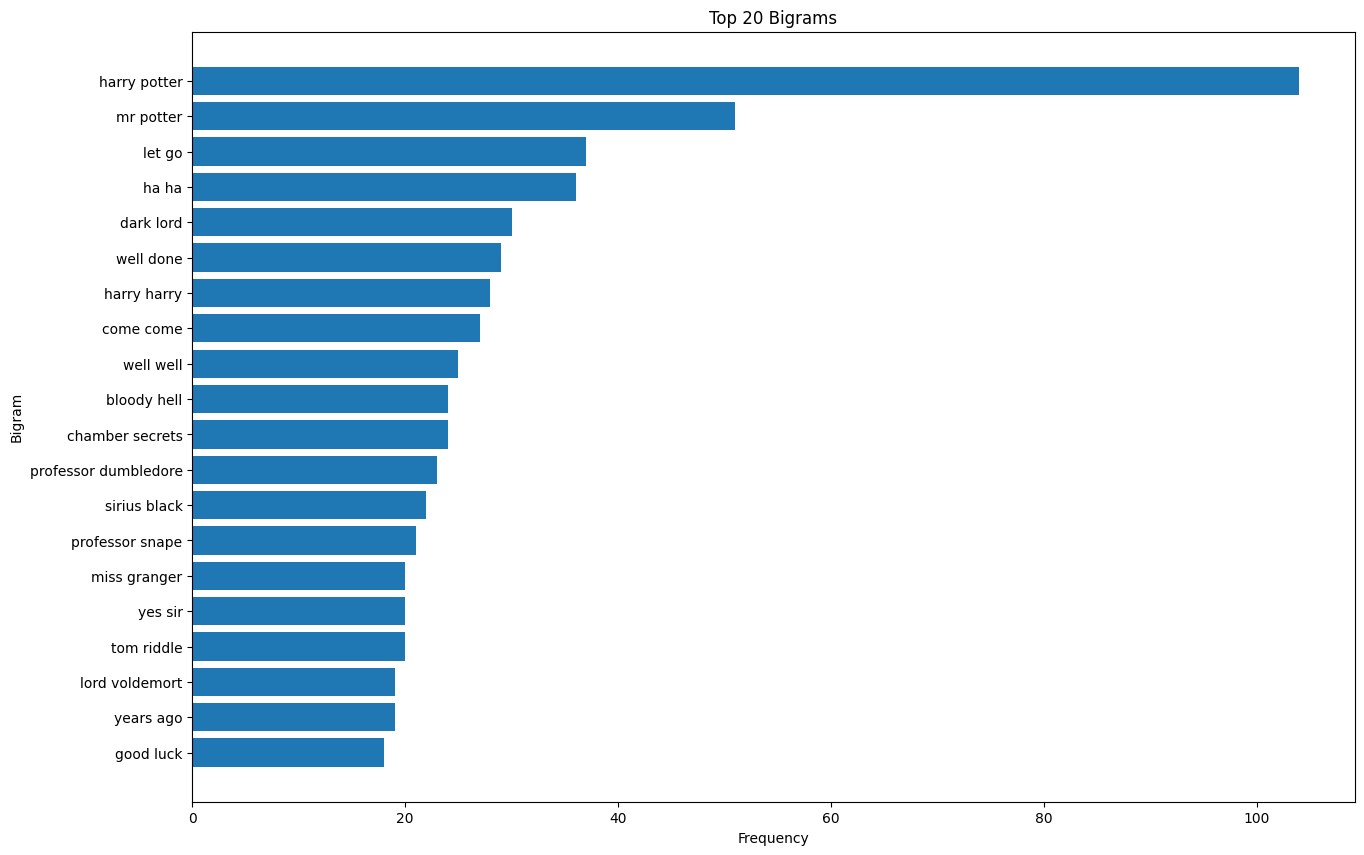

In [42]:
plt.figure(figsize=(15,10))
plt.barh(top_20_df['bigram'].map(str), top_20_df['count'])

# setting label of y-axis
plt.ylabel("Bigram")
# setting label of x-axis
plt.xlabel("Frequency")
plt.title("Top 20 Bigrams")
plt.show()

In the top 20 bigrams we see Harry Potter and Mr. Potter appear. We also see Professor Dumbledore, Professor Snape, and Sirius Black. Three of Voldemort's aliases appear as well: Dark Lord, Tom Riddle, and Lord Voldemort. 

### Character Sentiment Analysis

From the network analysis, we determined the main characters to be Harry, Ron, Hermione, Neville, Hargid, Dumbledore, Snape, and McGonagall. Let's analyze their dialogue in terms of their most frequent words and attempt to assess their overall positivity/negativity. We will do this using **NLTK**'s **VADER** package for sentiment analysis. 

First, let's take a look at the most common words/themes these characters tend to talk about. 

**Harry Potter**

In [43]:
harry_dialogue = final_dialogue[final_dialogue['character_name'] == "Harry Potter"]

What are the top 30 words in Harry's lexicon?

In [44]:
harry_tokens = combine_tokens(harry_dialogue['tokenized_dialogue'])

Let's lemmatize Harry's dialogue and find the 30 most common words he uses. 

In [45]:
harry_lem = []

for token in harry_tokens:
    harry_lem.append(nltk.WordNetLemmatizer().lemmatize(token))

top_30_harry = nltk.FreqDist(harry_lem).most_common(30)

top_30_harry

[('sir', 121),
 ('know', 118),
 ('think', 80),
 ('hermione', 78),
 ('one', 70),
 ('ron', 70),
 ('get', 63),
 ('well', 59),
 ('go', 59),
 ('hagrid', 59),
 ('professor', 57),
 ('got', 55),
 ('come', 52),
 ('right', 49),
 ('mean', 48),
 ('yeah', 46),
 ('like', 45),
 ('dumbledore', 45),
 ('see', 43),
 ('something', 42),
 ('yes', 41),
 ('back', 41),
 ('tell', 40),
 ('going', 40),
 ('could', 38),
 ('voldemort', 38),
 ('let', 36),
 ('need', 34),
 ('sirius', 32),
 ('u', 31)]

In Harry's top 30, we see Hermione, Ron, Hagrid, and Dumbledore all appear. We also see Voldemort and Sirius. 

Let's repeat this for the other characters.

**Ron Weasley**

In [46]:
def char_top_30(tokens):
    char_lem = []

    for token in tokens:
        char_lem.append(nltk.WordNetLemmatizer().lemmatize(token))

    top_30_char = nltk.FreqDist(char_lem).most_common(30)
    return top_30_char


ron_dialogue = final_dialogue[final_dialogue['character_name'] == "Ron Weasley"]

ron_tokens = combine_tokens(ron_dialogue['tokenized_dialogue'])

char_top_30(ron_tokens)

[('harry', 80),
 ('know', 53),
 ('think', 45),
 ('hermione', 42),
 ('got', 40),
 ('one', 39),
 ('go', 39),
 ('bloody', 35),
 ('like', 34),
 ('right', 34),
 ('get', 33),
 ('well', 30),
 ('bit', 26),
 ('oh', 24),
 ('yeah', 24),
 ('hell', 23),
 ('look', 22),
 ('let', 22),
 ('come', 21),
 ('something', 21),
 ('see', 20),
 ('u', 20),
 ('mean', 19),
 ('back', 19),
 ('really', 18),
 ('brilliant', 18),
 ('never', 18),
 ('tell', 18),
 ('good', 15),
 ('mum', 15)]

Ron's top word is Harry. We also see Hermione appear. He also tends to say "hell" and "brilliant" a lot. "Bloody" can be seen here as well as he usually says "bloody hell" or "bloody brilliant."

**Hermione Granger**

In [47]:
hermione_dialogue = final_dialogue[final_dialogue['character_name'] == "Hermione Granger"]

hermione_tokens = combine_tokens(hermione_dialogue['tokenized_dialogue'])

char_top_30(hermione_tokens)

[('harry', 151),
 ('know', 57),
 ('ron', 49),
 ('go', 37),
 ('think', 35),
 ('got', 32),
 ('one', 31),
 ('come', 31),
 ('going', 29),
 ('dumbledore', 29),
 ('like', 28),
 ('u', 28),
 ('see', 25),
 ('look', 25),
 ('something', 25),
 ('take', 21),
 ('oh', 20),
 ('well', 20),
 ('mean', 20),
 ('right', 20),
 ('really', 20),
 ('good', 18),
 ('could', 18),
 ('yes', 18),
 ('would', 16),
 ('hagrid', 16),
 ('time', 16),
 ('stop', 15),
 ('let', 14),
 ('get', 14)]

Hermione's top word is also Harry, but she says it almost twice as much as Ron. Ron, Dumbledore, and Hagrid also appear. 

**Neville Longbottom**

In [48]:
neville_dialogue = final_dialogue[final_dialogue['character_name'] == "Neville Longbottom"]

neville_tokens = combine_tokens(neville_dialogue['tokenized_dialogue'])

char_top_30(neville_tokens)

[('harry', 17),
 ('hey', 7),
 ('get', 6),
 ('know', 6),
 ('help', 5),
 ('okay', 5),
 ('good', 5),
 ('seamus', 4),
 ('oh', 4),
 ('come', 4),
 ('better', 4),
 ('yeah', 4),
 ('expelliarmus', 4),
 ('like', 4),
 ('sorry', 3),
 ('ahh', 3),
 ('stand', 3),
 ('curse', 3),
 ('let', 3),
 ('go', 3),
 ('ron', 3),
 ('professor', 3),
 ('u', 3),
 ('see', 3),
 ('never', 3),
 ('ahhhh', 2),
 ('ah', 2),
 ('said', 2),
 ('gryffindor', 2),
 ('bloody', 2)]

Once again, Harry is the top word for this character. Another character, Seamus, appears here in his top words as well. Interestingly, Neville does not appear to have much dialogue, but he was stil; featured as one of our most connected characters in our network analysis. 

In [49]:
dumbledore_dialogue = final_dialogue[final_dialogue['character_name'] == "Albus Dumbledore"]

dumbledore_tokens = combine_tokens(dumbledore_dialogue['tokenized_dialogue'])

char_top_30(dumbledore_tokens)

[('harry', 96),
 ('one', 37),
 ('would', 31),
 ('time', 31),
 ('professor', 30),
 ('voldemort', 29),
 ('see', 27),
 ('must', 27),
 ('yes', 25),
 ('know', 25),
 ('severus', 23),
 ('think', 22),
 ('well', 22),
 ('right', 19),
 ('like', 19),
 ('mr', 18),
 ('find', 18),
 ('good', 17),
 ('year', 17),
 ('tom', 17),
 ('much', 17),
 ('hogwarts', 16),
 ('say', 16),
 ('tell', 16),
 ('hagrid', 15),
 ('ah', 15),
 ('first', 15),
 ('boy', 15),
 ('place', 15),
 ('school', 13)]

The theme remains that Harry is the top word. This makes sense as Harry was the top word for the entire corpus. Voldemort appears high on Dumbledore's list, with him saying the name 29 times throughout the movies. Also appearing is Severus, Hogwarts, and Hagrid. 

**Hagrid**

In [50]:
hagrid_dialogue = final_dialogue[final_dialogue['character_name'] == "Rubeus Hagrid"]

hagrid_tokens = combine_tokens(hagrid_dialogue['tokenized_dialogue'])

char_top_30(hagrid_tokens)

[('harry', 49),
 ('well', 38),
 ('oh', 27),
 ('go', 24),
 ('come', 24),
 ('know', 23),
 ('yeh', 22),
 ('dumbledore', 20),
 ('right', 18),
 ('one', 16),
 ('professor', 14),
 ('got', 14),
 ('like', 14),
 ('get', 13),
 ('course', 12),
 ('see', 12),
 ('done', 12),
 ('hello', 10),
 ('think', 10),
 ('thing', 10),
 ('tha', 10),
 ('bit', 9),
 ('hogwarts', 9),
 ('wizard', 9),
 ('say', 9),
 ('ron', 9),
 ('ter', 9),
 ('buckbeak', 9),
 ('im', 9),
 ('would', 8)]

Harry, Dumbledore, and Ron appear. Hogwarts is also in the top 30, as well as Buckbeak the hippogriff. 

**McGonagall**

In [51]:
mcgonagall_dialogue = final_dialogue[final_dialogue['character_name'] == "Minerva McGonagall"]

mcgonagall_tokens = combine_tokens(mcgonagall_dialogue['tokenized_dialogue'])

char_top_30(mcgonagall_tokens)

[('potter', 30),
 ('well', 17),
 ('mr', 13),
 ('professor', 10),
 ('house', 10),
 ('one', 10),
 ('student', 10),
 ('three', 10),
 ('weasley', 9),
 ('school', 9),
 ('know', 8),
 ('dumbledore', 7),
 ('boy', 7),
 ('think', 7),
 ('slytherin', 7),
 ('point', 7),
 ('please', 7),
 ('would', 7),
 ('could', 6),
 ('two', 6),
 ('right', 6),
 ('go', 6),
 ('yes', 6),
 ('chamber', 6),
 ('sirius', 6),
 ('black', 6),
 ('good', 5),
 ('hogwarts', 5),
 ('take', 5),
 ('gryffindor', 5)]

For McGonagall, Potter is the top word on her list. This still follows the same theme of Harry being the most mentioned person, but McGonagall only refers to him by his last name. Weasley, Ron's last name, also appears, as well as Dumbledore. 

Even though he did not appear in our top connected characters, let's take a look at Voldemort's top words.

In [52]:
voldemort_dialogue = final_dialogue[final_dialogue['character_name'] == "Voldemort"]

voldemort_tokens = combine_tokens(voldemort_dialogue['tokenized_dialogue'])

char_top_30(voldemort_tokens)

[('harry', 21),
 ('potter', 14),
 ('wand', 12),
 ('come', 11),
 ('one', 10),
 ('boy', 9),
 ('see', 9),
 ('would', 9),
 ('nagini', 9),
 ('severus', 9),
 ('must', 8),
 ('give', 8),
 ('kill', 8),
 ('tell', 7),
 ('live', 6),
 ('wormtail', 6),
 ('find', 6),
 ('lie', 5),
 ('blood', 5),
 ('something', 5),
 ('death', 5),
 ('lucius', 5),
 ('know', 5),
 ('another', 4),
 ('cannot', 4),
 ('get', 4),
 ('done', 4),
 ('say', 4),
 ('friend', 4),
 ('even', 4)]

Harry also appear at the top of Voldemort's list, as well as Potter. Nagini, his snake, and Severus also appear. We can also see some of his obsessions, such as his wand and death (kill, death, blood). 

Now let's track the positivity and negativity of these characters.

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create function for positive and negative scores
def get_positive_sentiment(sentence):
     sentiment_score = SentimentIntensityAnalyzer().polarity_scores(sentence)
     # extract 'pos' attribute
     positive_meter = sentiment_score['pos']
     return positive_meter

def get_negative_sentiment(sentence):
     sentiment_score = SentimentIntensityAnalyzer().polarity_scores(sentence)
     # extract 'neg' attribute
     negative_meter = sentiment_score['neg']
     return negative_meter

In [54]:
def token_to_str(tokens):
    str_output = ' '.join(tokens)
    return(str_output)

final_dialogue['token_str'] = final_dialogue['tokenized_dialogue'].apply(token_to_str)

final_dialogue['pos'] = final_dialogue['token_str'].apply(get_positive_sentiment)
final_dialogue['neg'] = final_dialogue['token_str'].apply(get_negative_sentiment)

In [55]:
final_dialogue.head()

dialogue_id                               movie_title  chapter_id  \
0            1  Harry Potter and the Philosopher's Stone           1   
1            2  Harry Potter and the Philosopher's Stone           1   
2            3  Harry Potter and the Philosopher's Stone           1   
3            4  Harry Potter and the Philosopher's Stone           1   
4            5  Harry Potter and the Philosopher's Stone           1   

        chapter_name      place_name place_category      character_name  \
0  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
1  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
2  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
3  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
4  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   

        house                                           dialogue  \
0  Gryffindor  I should have known that you would be here Pro...   
1  Gryffindor  Good evening, Professor Dumbledore. Are the ru...   
2  Gryffindor   I'm afraid so, Professor. The good, and the bad.   
3  Gryffindor                                       And the boy?   
4  Gryffindor                            Hagrid is bringing him.   

                                  tokenized_dialogue  \
0              [known, would, professor, mcgonagall]   
1  [good, evening, professor, dumbledore, rumours...   
2                     [afraid, professor, good, bad]   
3                                              [boy]   
4                                 [hagrid, bringing]   

                                           token_str    pos    neg  
0                   known would professor mcgonagall  0.000  0.000  
1  good evening professor dumbledore rumours true...  0.533  0.000  
2                          afraid professor good bad  0.345  0.417  
3                                                boy  0.000  0.000  
4                                    hagrid bringing  0.000  0.000

What is each character's overall sentiment?

In [56]:
main_char_dialogue = final_dialogue[final_dialogue['character_name'].isin(["Harry Potter", "Ron Weasley", "Hermione Granger", "Albus Dumbledore", "Neville Longbottom", "Minerva McGonagall"])]

main_char_dialogue.groupby('character_name')[['pos', 'neg']].mean()

pos       neg
character_name                        
Albus Dumbledore    0.219190  0.107791
Harry Potter        0.158866  0.096292
Hermione Granger    0.159067  0.099347
Minerva McGonagall  0.199046  0.066362
Neville Longbottom  0.192306  0.129432
Ron Weasley         0.157669  0.131964

All of the characters tend to have more positive dialogue. 

Dumbledore and McGonagall's positivity ratings are more than twice their negativity ratings. 

Harry, Hermione, and Ron all have very similar positivity ratings, but Ron's negativity rating is significantly higher than those of Harry and Hermione. This makes some sense as Ron is known to be the slightly more moody/negative of the bunch. 

Neville has a much higher positivity rating than Harry, Hermione, and Ron, but his negativity rating is on par with Ron's. 

Let's see how this compares to Voldemort's language and his known death eaters. 

In [57]:
death_eater_dialogue = final_dialogue[final_dialogue['character_name'].isin(["Voldemort", "Severus Snape", "Lucius Malfoy", "Draco Malfoy", "Bellatrix Lestrange"])]

death_eater_dialogue.groupby('character_name')[['pos', 'neg']].mean()

pos       neg
character_name                         
Bellatrix Lestrange  0.231121  0.130864
Draco Malfoy         0.188612  0.143621
Lucius Malfoy        0.165794  0.106778
Severus Snape        0.168899  0.079054
Voldemort            0.163297  0.191068

Voldemort tends to have more negative dialogue, which makes sense as he talk a lot about killing and death.

Interestingly, the other characters tend to have more positive sentiment in their dialogue, with Bellatrix's positivity rating being almost twice that of her negativity. This could be due to her tendency to kiss up to Voldemort and speak highly of him. 

Draco is very pompous and confident so it makes sense that he may use a lot of positive speech about himself or his family. 

Let's see how this tracks over each movie.

In [58]:
movie_numbers = {}
i = 1

for title in final_dialogue['movie_title'].unique():
    movie_numbers[title] = i
    i+=1

main_char_dialogue['movie_number'] = main_char_dialogue['movie_title'].map(movie_numbers)

book_char_sentiments = main_char_dialogue.groupby(['character_name', 'movie_title', 'movie_number'])[['pos', 'neg']].mean().reset_index().sort_values(['character_name', 'movie_number'])

In [59]:
pivot_sentiments = book_char_sentiments.pivot(index="movie_number", columns=['character_name'], values=['pos', 'neg'])

pivot_sentiments

pos                                \
character_name Albus Dumbledore Harry Potter Hermione Granger   
movie_number                                                    
1                      0.336167     0.144322         0.154299   
2                      0.303267     0.129287         0.143429   
3                      0.248054     0.191138         0.164450   
4                      0.227704     0.192714         0.145587   
5                      0.141162     0.158854         0.192223   
6                      0.202917     0.211560         0.169861   
7                           NaN     0.130142         0.147213   
8                      0.252611     0.124097         0.159672   

                                                                  \
character_name Minerva McGonagall Neville Longbottom Ron Weasley   
movie_number                                                       
1                        0.232935           0.116167    0.169542   
2                        0.098667           0.060000    0.132623   
3                        0.148182           0.233727    0.177176   
4                        0.193905           0.235231    0.191145   
5                        0.266333           0.126818    0.124208   
6                        0.220684           0.226250    0.191680   
7                             NaN           0.000000    0.135904   
8                             NaN           0.271743    0.150633   

                            neg                                \
character_name Albus Dumbledore Harry Potter Hermione Granger   
movie_number                                                    
1                      0.097958     0.077161         0.139825   
2                      0.125644     0.103877         0.102214   
3                      0.006973     0.113325         0.125061   
4                      0.101014     0.077093         0.073016   
5                      0.141646     0.101596         0.078830   
6                      0.108292     0.073361         0.101704   
7                           NaN     0.111532         0.081688   
8                      0.111870     0.109022         0.095281   

                                                                  
character_name Minerva McGonagall Neville Longbottom Ron Weasley  
movie_number                                                      
1                        0.056613           0.187444    0.097908  
2                        0.111250           0.084571    0.133719  
3                        0.059455           0.000000    0.133971  
4                        0.074429           0.182077    0.177487  
5                        0.050750           0.066500    0.116434  
6                        0.040368           0.043750    0.112410  
7                             NaN           1.000000    0.138473  
8                             NaN           0.154171    0.164962

In [60]:
pos = pivot_sentiments['pos'].reset_index()

pos.index = pos.index+1

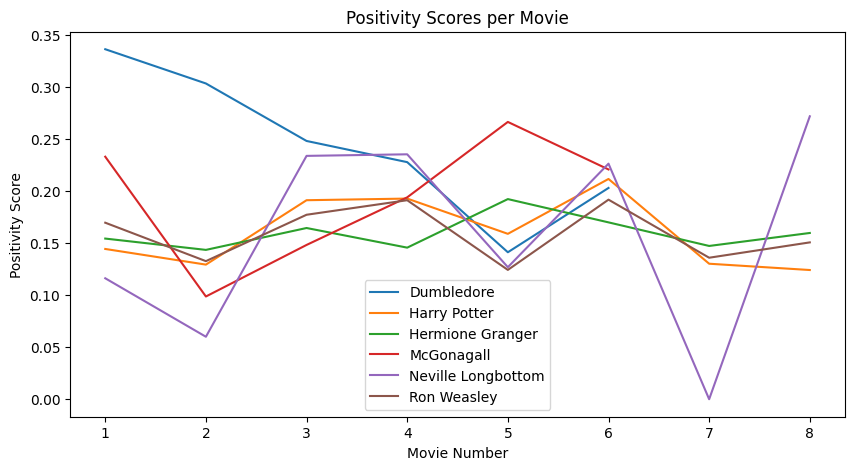

In [61]:
plt.figure(figsize=(10, 5))

plt.title("Positivity Scores per Movie")
plt.xlabel("Movie Number")
plt.ylabel("Positivity Score")

plt.plot(pos["Albus Dumbledore"], label = "Dumbledore")
plt.plot(pos["Harry Potter"], label = "Harry Potter")
plt.plot(pos["Hermione Granger"], label = "Hermione Granger")
plt.plot(pos["Minerva McGonagall"], label = "McGonagall")
plt.plot(pos["Neville Longbottom"], label = "Neville Longbottom")
plt.plot(pos["Ron Weasley"], label = "Ron Weasley")

plt.legend()
plt.show()

Dumbledore's positivity mostly decreases from each movie, with a slight increase from movie five to movie six. Harry, Hermione, and Ron's positivity flunctuates. Both Harry and Ron have a similar dip in positivity in the fifth movie. Interestingly, Hermione has an almost opposite pattern to Harry and Ron. It seems when they are less positive she tends to be more positive and when they are more positive she tends to be less positive.

Let's compare this to the negativity scores for these characters. 

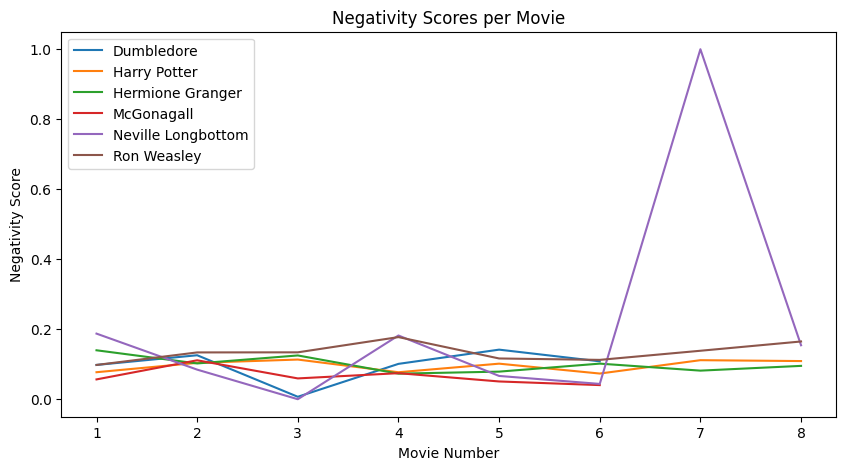

In [62]:
neg = pivot_sentiments['neg'].reset_index()

neg.index = neg.index+1

plt.figure(figsize=(10, 5))

plt.title("Negativity Scores per Movie")
plt.xlabel("Movie Number")
plt.ylabel("Negativity Score")

plt.plot(neg["Albus Dumbledore"], label = "Dumbledore")
plt.plot(neg["Harry Potter"], label = "Harry Potter")
plt.plot(neg["Hermione Granger"], label = "Hermione Granger")
plt.plot(neg["Minerva McGonagall"], label = "McGonagall")
plt.plot(neg["Neville Longbottom"], label = "Neville Longbottom")
plt.plot(neg["Ron Weasley"], label = "Ron Weasley")

plt.legend()
plt.show()

Neville has the highest negativity score from his dialogue in the seventh movie. What is his dialogue?

In [63]:
neville = main_char_dialogue[main_char_dialogue['character_name'] == "Neville Longbottom"]
neville[neville['movie_number'] == 7]

dialogue_id                                  movie_title  chapter_id  \
6091         6092  Harry Potter and the Deathly Hallows Part 1         192   

         chapter_name          place_name place_category      character_name  \
6091  Kreacher's Tale  12 Grimmauld Place      Dwellings  Neville Longbottom   

           house                 dialogue tokenized_dialogue token_str  pos  \
6091  Gryffindor  He not here, you fools.            [fools]     fools  0.0   

      neg  movie_number  
6091  1.0             7

In this movie, Neville has one line where he insults the death eaters who are checking the trains to see if Harry Potter boarded the Hogwarts Express. 

Neville also has high negativity for movies one and four. In the first movie, Neville tends to be very forgetfull and clumsy. He also argues with the golden trio when they are about to do something that he thinks will lose points for Gryffindor. 

Let's remove Neville to see the scores of the other characters more clearly. 

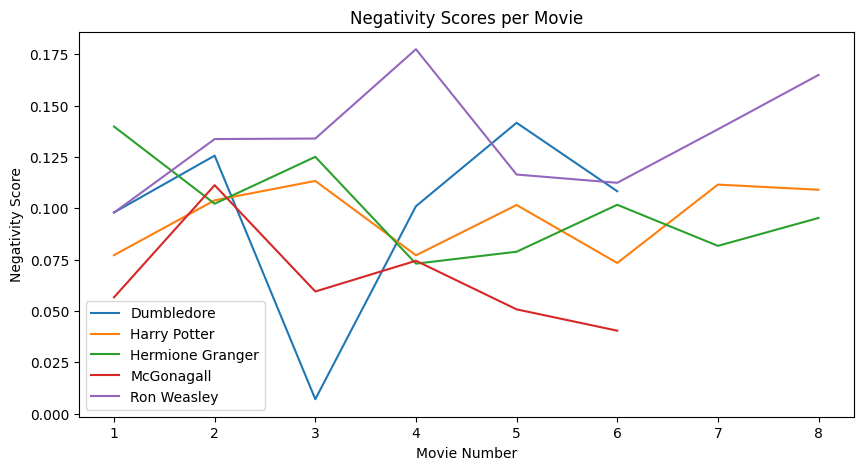

In [64]:
plt.figure(figsize=(10, 5))

plt.title("Negativity Scores per Movie")
plt.xlabel("Movie Number")
plt.ylabel("Negativity Score")

plt.plot(neg["Albus Dumbledore"], label = "Dumbledore")
plt.plot(neg["Harry Potter"], label = "Harry Potter")
plt.plot(neg["Hermione Granger"], label = "Hermione Granger")
plt.plot(neg["Minerva McGonagall"], label = "McGonagall")
plt.plot(neg["Ron Weasley"], label = "Ron Weasley")

plt.legend()
plt.show()

Ron has the highest negativity score, with a score of about 0.175 in the fourth movie. In this movie, he is very moody and jealous and he argues with Harry because he thinks Harry put his name in the Goblet of Fire on purpose to gain more fame. 

### Conclusions

Now that we have finished our analysis, we can answer the questions we posed in the beginning of the notebook.

**Which characters had the most unique interactions with other characters?**
- Harry, Ron, and Hermione unsurprisingly had the most interactions with each others. 
- Neville and Hagrid appeared more than expected, which shows them to be somewhat more low-key influencers in the series. 

**Who are the characters that had the most chapters with other characters?**
- Harry, Ron, and Hermione (the "golden trio"). 

**Who had the most influence over characters?**
- Harry by far has the most influence. He appears in the most scenes and he appears with almost every character from the series. This makes sense since he is the main character of the series. 

**What do characters tend to talk about?**
- The top word for all main characters and Voldemort was “Harry,” so characters tend to either talk about Harry or talk to Harry while addressing him.
- The names of other characters also appear in each character's dialogue, so they tend to talk about other characters who are important to them. 

**Do certain characters tend to talk about negative things vs. positive?**
- Most characters tend to have more positive language. Even the death eaters' dialogues have higher positivity rating than negativity ratings. 
- Voldemort is the only character whose negative language outweighs their positive language. This makes sense as he is the main villain and he talks about death and killing often.

### Limitations

**_Sentiment Analysis_**: One of the limitations of the sentiment analysis portion of this project is that the Harry Potter universe contains many made-up words, places, and spells. As such, the sentiment analysis tool may not know how to poperly rate these words. For example, "avada" or "kedavra" should be rated very negatively as these are portions of the killing curse, but the sentiment analysis tool cannot know that these words basically mean the same as "kill." 